<a href="https://colab.research.google.com/github/czokw1/ml-predict-bank-deposit/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project Description

Abstract: The data is related to marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will take a bank deposit (variable target).


#### Import libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# models trainng

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from imblearn.over_sampling import SMOTE

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,roc_curve,confusion_matrix,classification_report

from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)


####Load Data

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS/Project/data/bank-additional-full.csv',sep=';')

In [ ]:
dataset.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16586,27,services,single,university.degree,no,no,no,cellular,jul,wed,698,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
39585,51,services,married,high.school,no,no,no,cellular,may,tue,1267,1,999,1,failure,-1.8,93.876,-40.0,0.668,5008.7,yes
41042,25,student,single,high.school,no,yes,no,cellular,oct,mon,211,2,6,3,success,-1.1,94.601,-49.5,1.032,4963.6,yes
15913,30,management,married,university.degree,no,no,yes,cellular,jul,mon,833,5,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
4981,33,services,divorced,high.school,no,yes,yes,telephone,may,wed,88,3,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
20494,48,admin.,married,university.degree,no,yes,no,telephone,aug,tue,58,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
34756,29,blue-collar,single,basic.4y,unknown,yes,no,telephone,may,thu,42,3,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
18437,50,management,married,university.degree,unknown,yes,no,telephone,jul,thu,30,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
32843,52,services,married,high.school,unknown,yes,no,cellular,may,mon,930,1,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,yes
15022,25,blue-collar,married,basic.4y,no,no,yes,cellular,jul,thu,521,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no


In [ ]:
#Update y variable to int type
dataset['y'].replace({'yes':1,'no':0},inplace=True)

In [ ]:
#Rename y variable to 'target'
dataset.rename({'y':'target'},axis=1, inplace=True)

In [ ]:
dataset.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
17345,44,admin.,married,high.school,unknown,no,no,cellular,jul,mon,327,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
15807,47,housemaid,divorced,basic.4y,unknown,no,no,cellular,jul,mon,255,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0
11807,37,blue-collar,married,basic.9y,no,no,no,telephone,jun,fri,15,7,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
20655,57,admin.,single,university.degree,unknown,yes,no,cellular,aug,wed,334,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
778,32,admin.,married,high.school,no,yes,no,telephone,may,wed,395,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
4479,58,retired,married,basic.4y,unknown,no,no,telephone,may,tue,1045,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,1
35701,39,admin.,single,university.degree,no,yes,yes,cellular,may,mon,9,4,999,1,failure,-1.8,92.893,-46.2,1.244,5099.1,0
28319,24,student,single,high.school,no,yes,no,cellular,apr,wed,74,1,999,0,nonexistent,-1.8,93.075,-47.1,1.445,5099.1,0
23602,38,unknown,married,unknown,no,yes,no,cellular,aug,thu,44,3,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
6237,34,unknown,married,basic.4y,unknown,yes,no,telephone,may,tue,267,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#Exploratory data analysis

##Attribute information:

 Input variables:

   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   8 - contact: contact communication type (categorical: "cellular","telephone") 

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
 
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):

  21 - target - has the client subscribed a term deposit? (binary: "yes","no")

##Checking data type of variables

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##Checking if there are any missing values

In [ ]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
target            0
dtype: int64

##Checking descriptive statistics

In [ ]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


##Unique values per column

In [ ]:
for column in dataset.columns:
  print(f'{column} --> {len(dataset[column].unique())}')
  print(f'{dataset[column].unique()}')
  print()

age --> 78
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

job --> 12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital --> 4
['married' 'single' 'divorced' 'unknown']

education --> 8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default --> 3
['no' 'unknown' 'yes']

housing --> 3
['no' 'yes' 'unknown']

loan --> 3
['no' 'yes' 'unknown']

contact --> 2
['telephone' 'cellular']

month --> 10
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week --> 5
['mon' 'tue' 'wed' 'thu' 'fri']

duration --> 1544
[ 261  149  226 ... 1246 1556 1868]

campaign --> 42
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 

##Checking correlation between variables

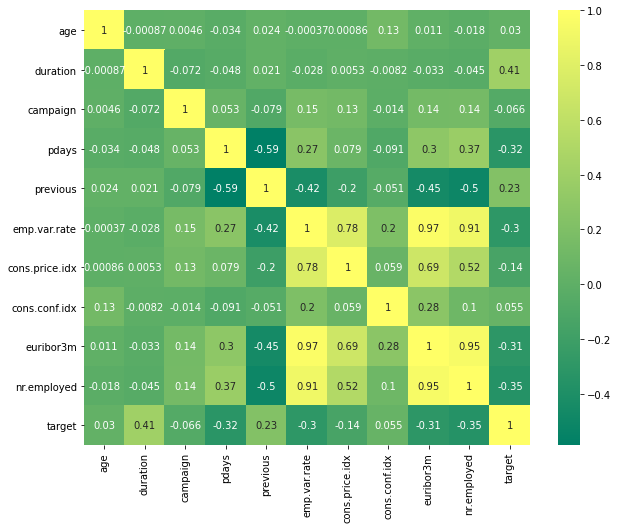

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='summer');

##Checking ratio target variable

Target variable

In [ ]:
dataset['target'].value_counts()/dataset.shape[0]

0    0.887346
1    0.112654
Name: target, dtype: float64

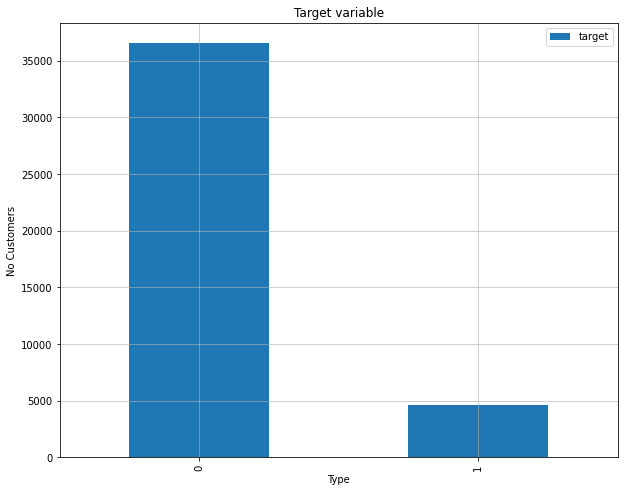

In [ ]:
plt.figure(figsize=(10,8))
dataset['target'].value_counts().plot(kind='bar')
plt.title('Target variable')
plt.ylabel('No Customers')
plt.xlabel('Type')
plt.legend()
plt.grid(axis='both', alpha=0.75);

Conculsion

Out dataset is highly impbalaced. There are only 11% of customers who have aleardy taken a bank term offer.


##Checking variables 

 Variables

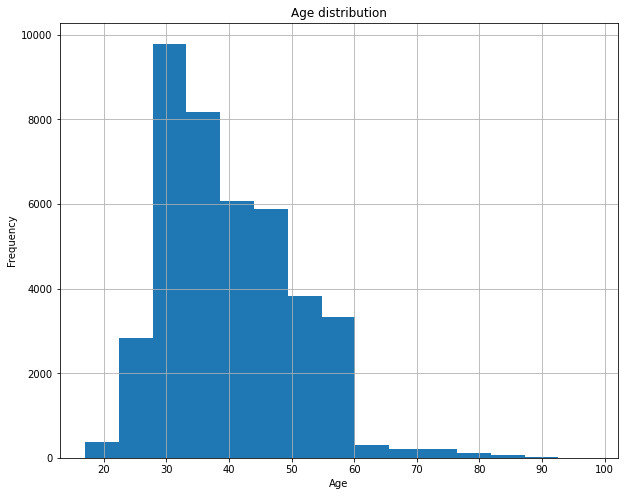

In [ ]:
plt.figure(figsize=(10,8))
dataset['age'].hist(bins=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution');

###Plotting variables to check thier distribiution

In [ ]:
def plot_variables(var):
  order = dataset[var].value_counts().index
  plt.figure(figsize=(10,8))
  sns.countplot(y=var,data=dataset,order=order)
  plt.title(f'{var} distribution'.capitalize())
  plt.xlabel('No Customers'.capitalize())
  plt.ylabel(f'{var} Type'.capitalize());

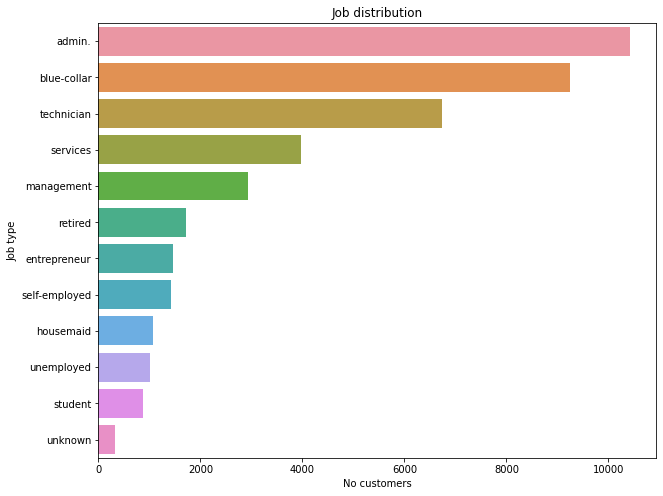

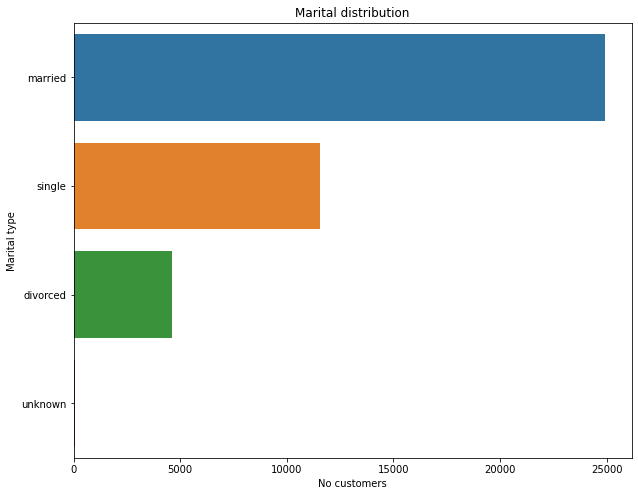

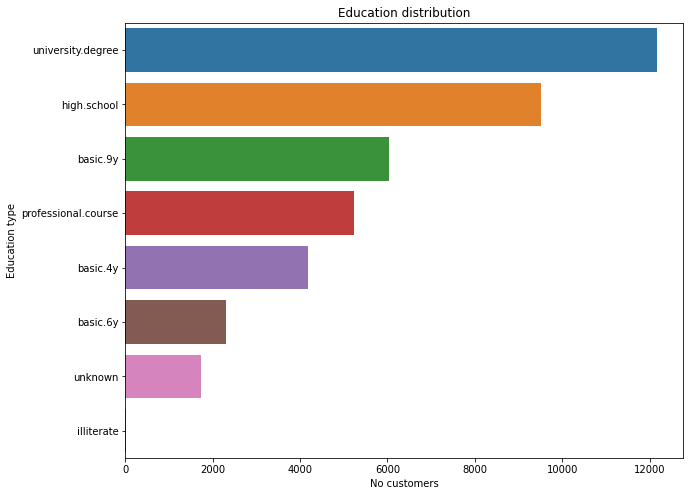

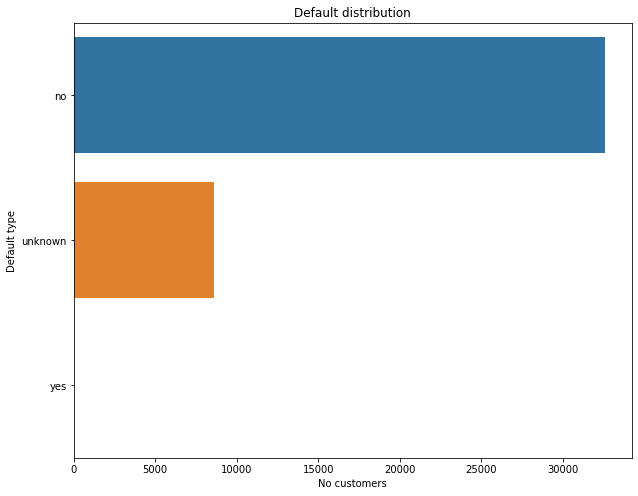

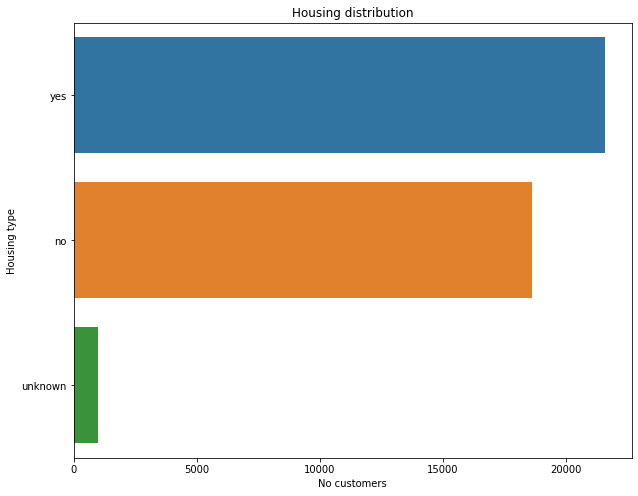

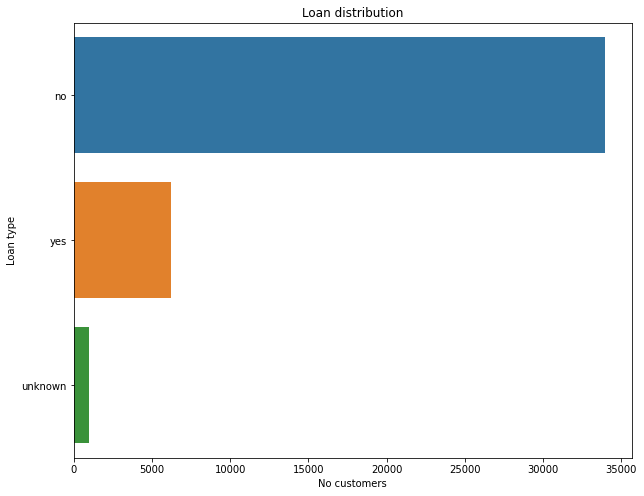

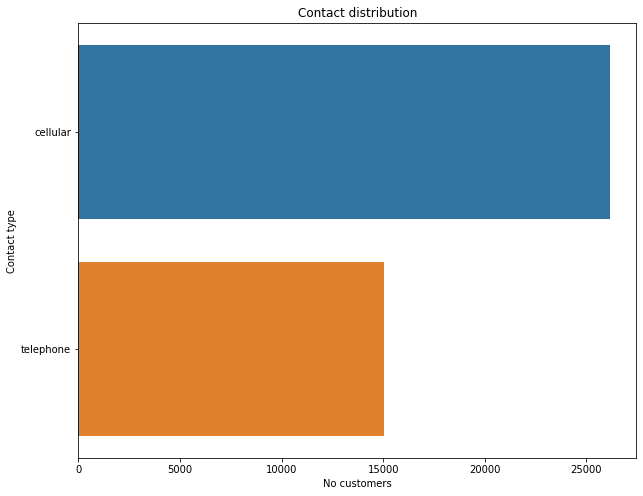

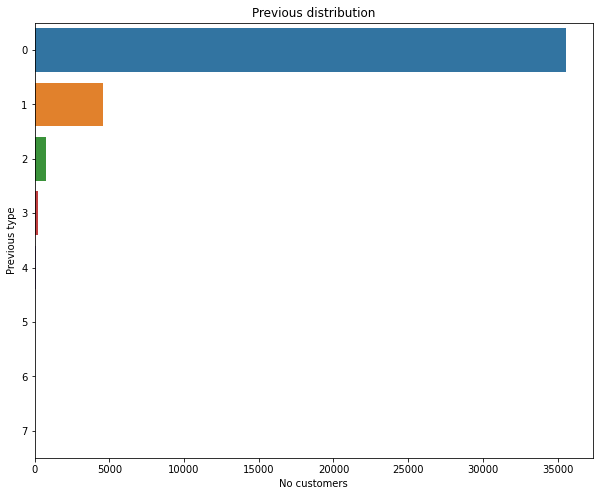

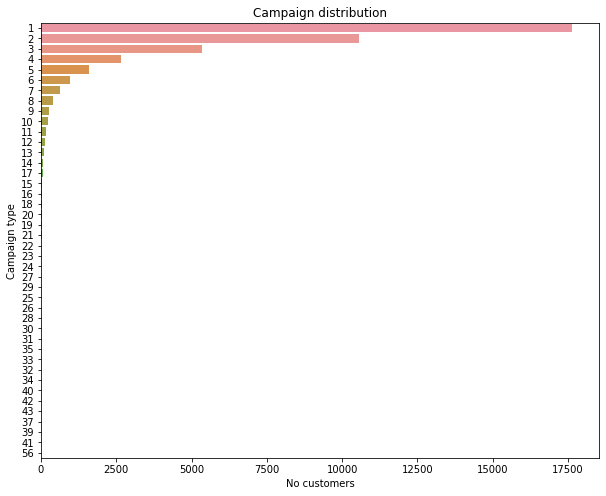

In [ ]:
dataset.columns
vars = ['job', 'marital', 'education', 'default', 'housing','loan','contact','previous','campaign']

[plot_variables(var) for var in vars];

###Plotting variables by target

In [ ]:
def plot_variablesByTarget(var,target):
  order = dataset[var].value_counts().index
  plt.figure(figsize=(10,8))
  sns.countplot(y=var,hue=target,data=dataset,order=order)
  plt.title(f'{var} distribution divided by target variable'.capitalize())
  plt.xlabel('No Customers'.capitalize())
  plt.ylabel(f'{var} Type'.capitalize());

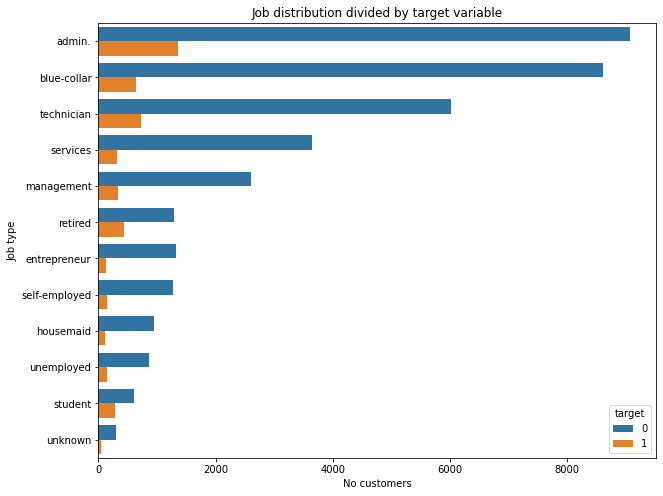

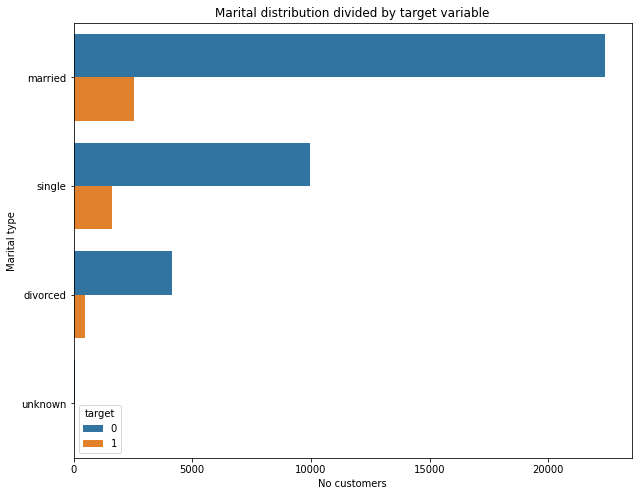

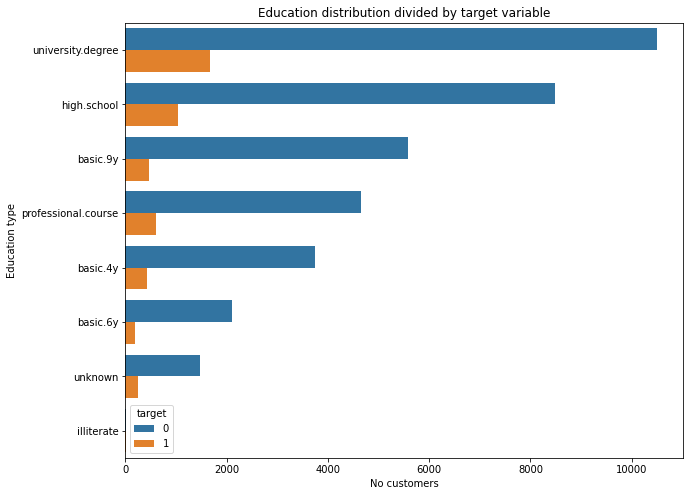

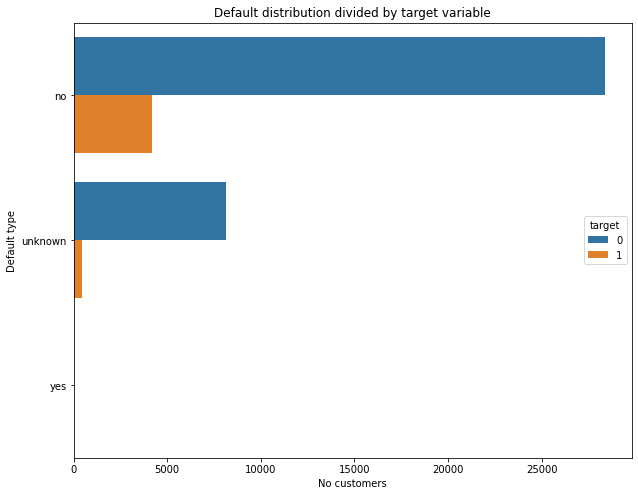

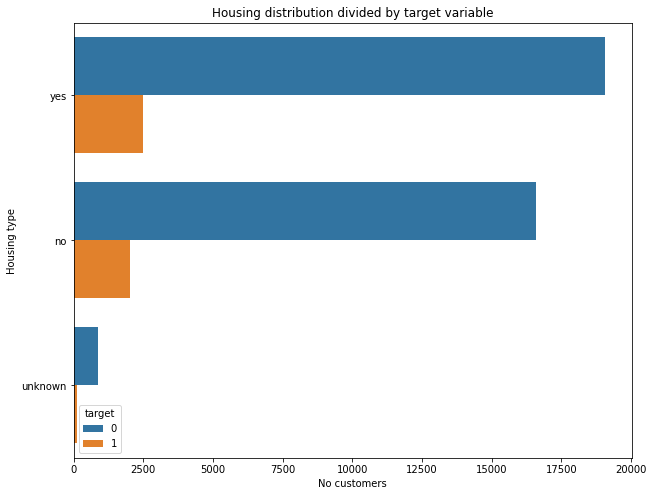

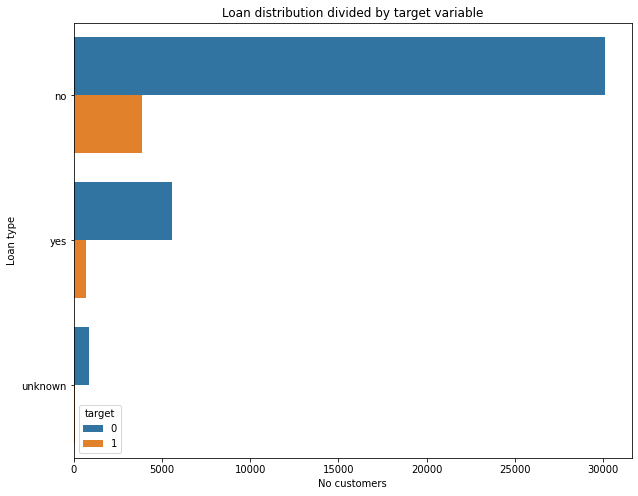

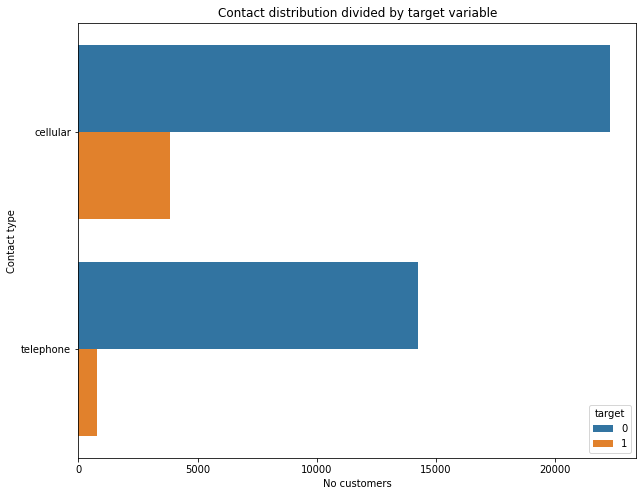

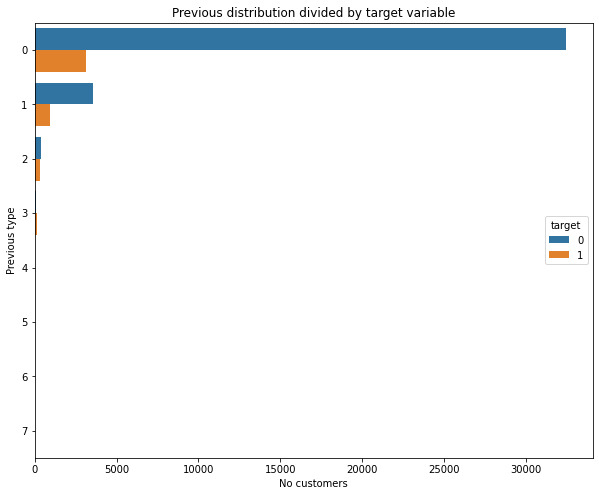

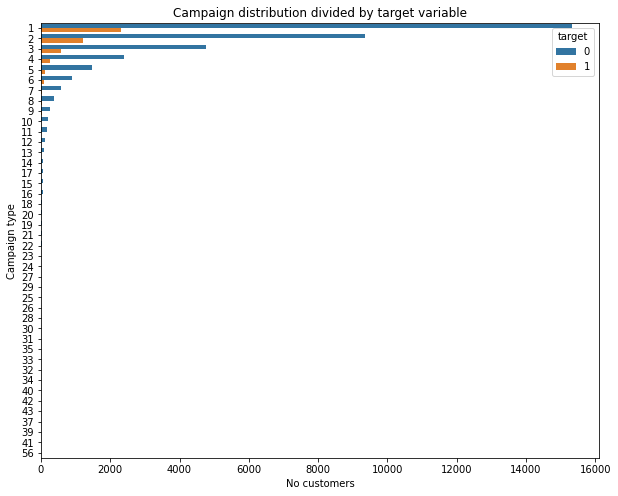

In [ ]:
vars = ['job', 'marital', 'education', 'default', 'housing','loan','contact','previous','campaign']

[plot_variablesByTarget(var,'target') for var in vars];

###Checking variables divided by type

In [ ]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

Numeric columns

In [ ]:
numeric_columns =  dataset.select_dtypes(include=np.number).columns

numeric_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'target'],
      dtype='object')

Non numeric columns

In [ ]:
non_numeric_columns = dataset.select_dtypes(exclude=np.number).columns

non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:
def plot_num_variablesByType(): 
  for column in numeric_columns:

    print(f'Column name: {column}')
    print(f'Unique values: {len(dataset[column].unique())}')
    dataset[column].plot.hist(bins=20)
    plt.show()

Plotting numeric columns

Column name: age
Unique values: 78


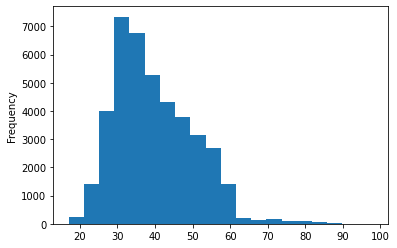

Column name: duration
Unique values: 1544


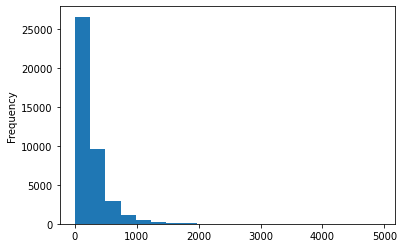

Column name: campaign
Unique values: 42


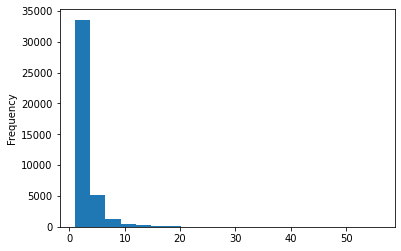

Column name: pdays
Unique values: 27


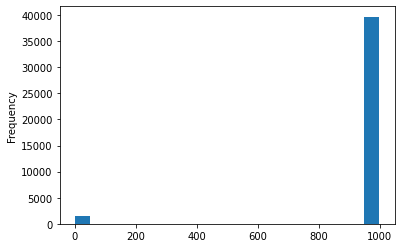

Column name: previous
Unique values: 8


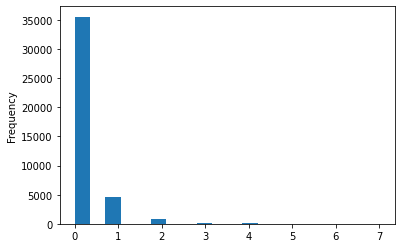

Column name: emp.var.rate
Unique values: 10


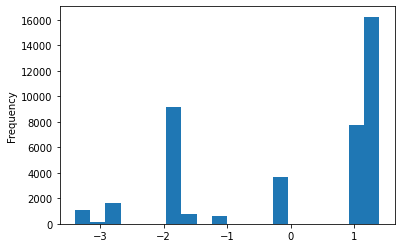

Column name: cons.price.idx
Unique values: 26


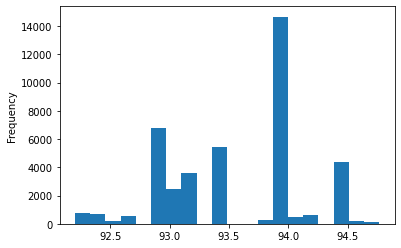

Column name: cons.conf.idx
Unique values: 26


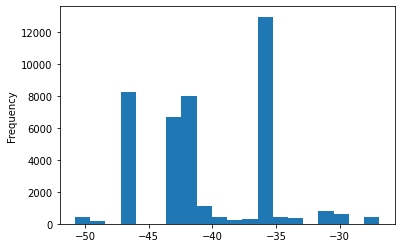

Column name: euribor3m
Unique values: 316


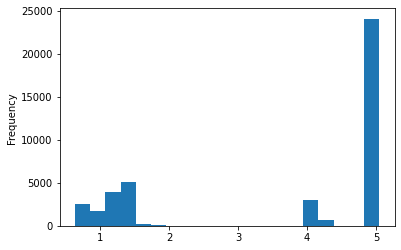

Column name: nr.employed
Unique values: 11


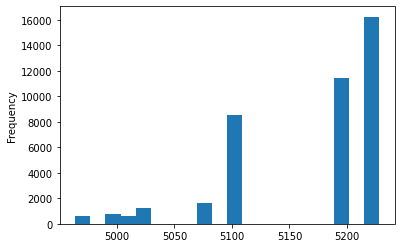

Column name: target
Unique values: 2


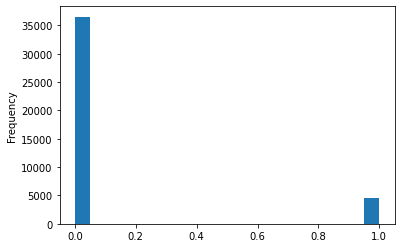

In [ ]:
plot_num_variablesByType()

Plotting non numeric columns

In [ ]:
def plot_non_num_variablesByType():
  for column in non_numeric_columns:
    print(f'Column name: {column}')
    print(f'Unique values:{len(dataset[column].unique())}')
    dataset[column].value_counts().plot.bar()
    plt.show()

Column name: job
Unique values:12


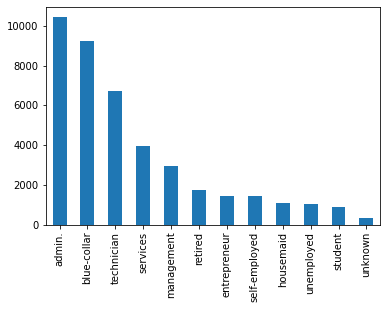

Column name: marital
Unique values:4


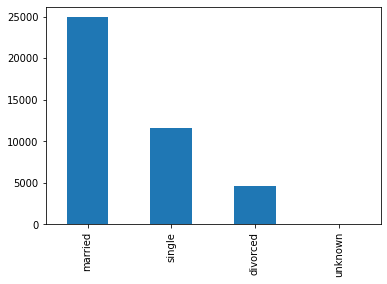

Column name: education
Unique values:8


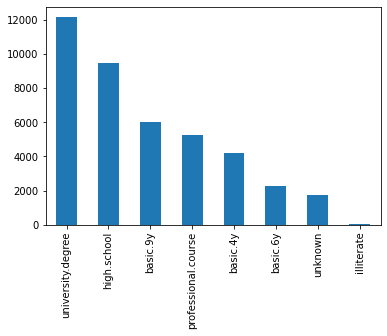

Column name: default
Unique values:3


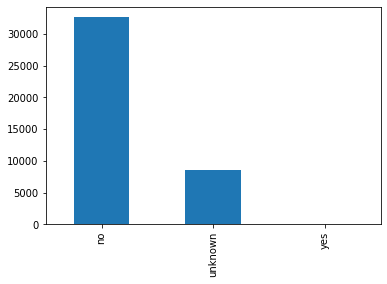

Column name: housing
Unique values:3


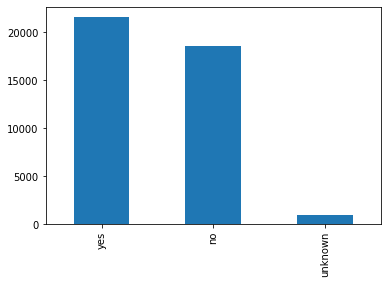

Column name: loan
Unique values:3


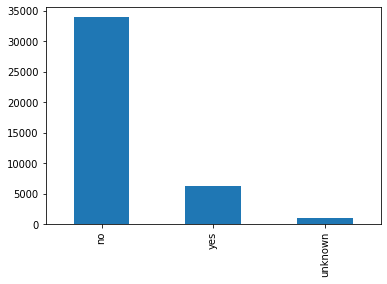

Column name: contact
Unique values:2


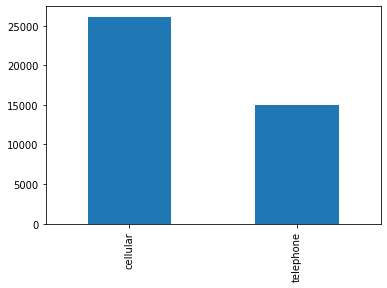

Column name: month
Unique values:10


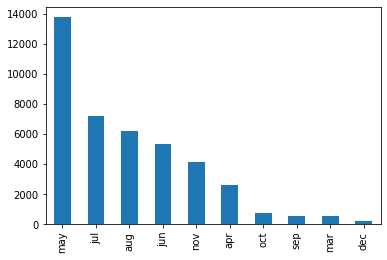

Column name: day_of_week
Unique values:5


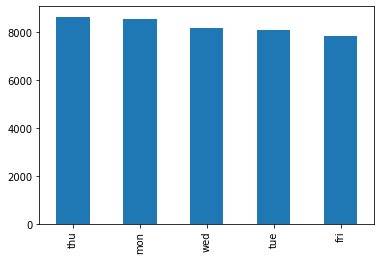

Column name: poutcome
Unique values:3


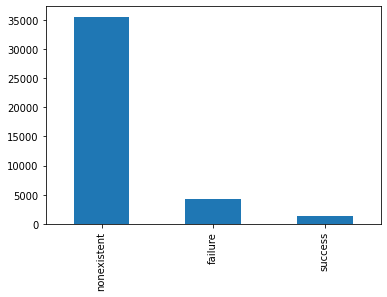

In [ ]:
plot_non_num_variablesByType()

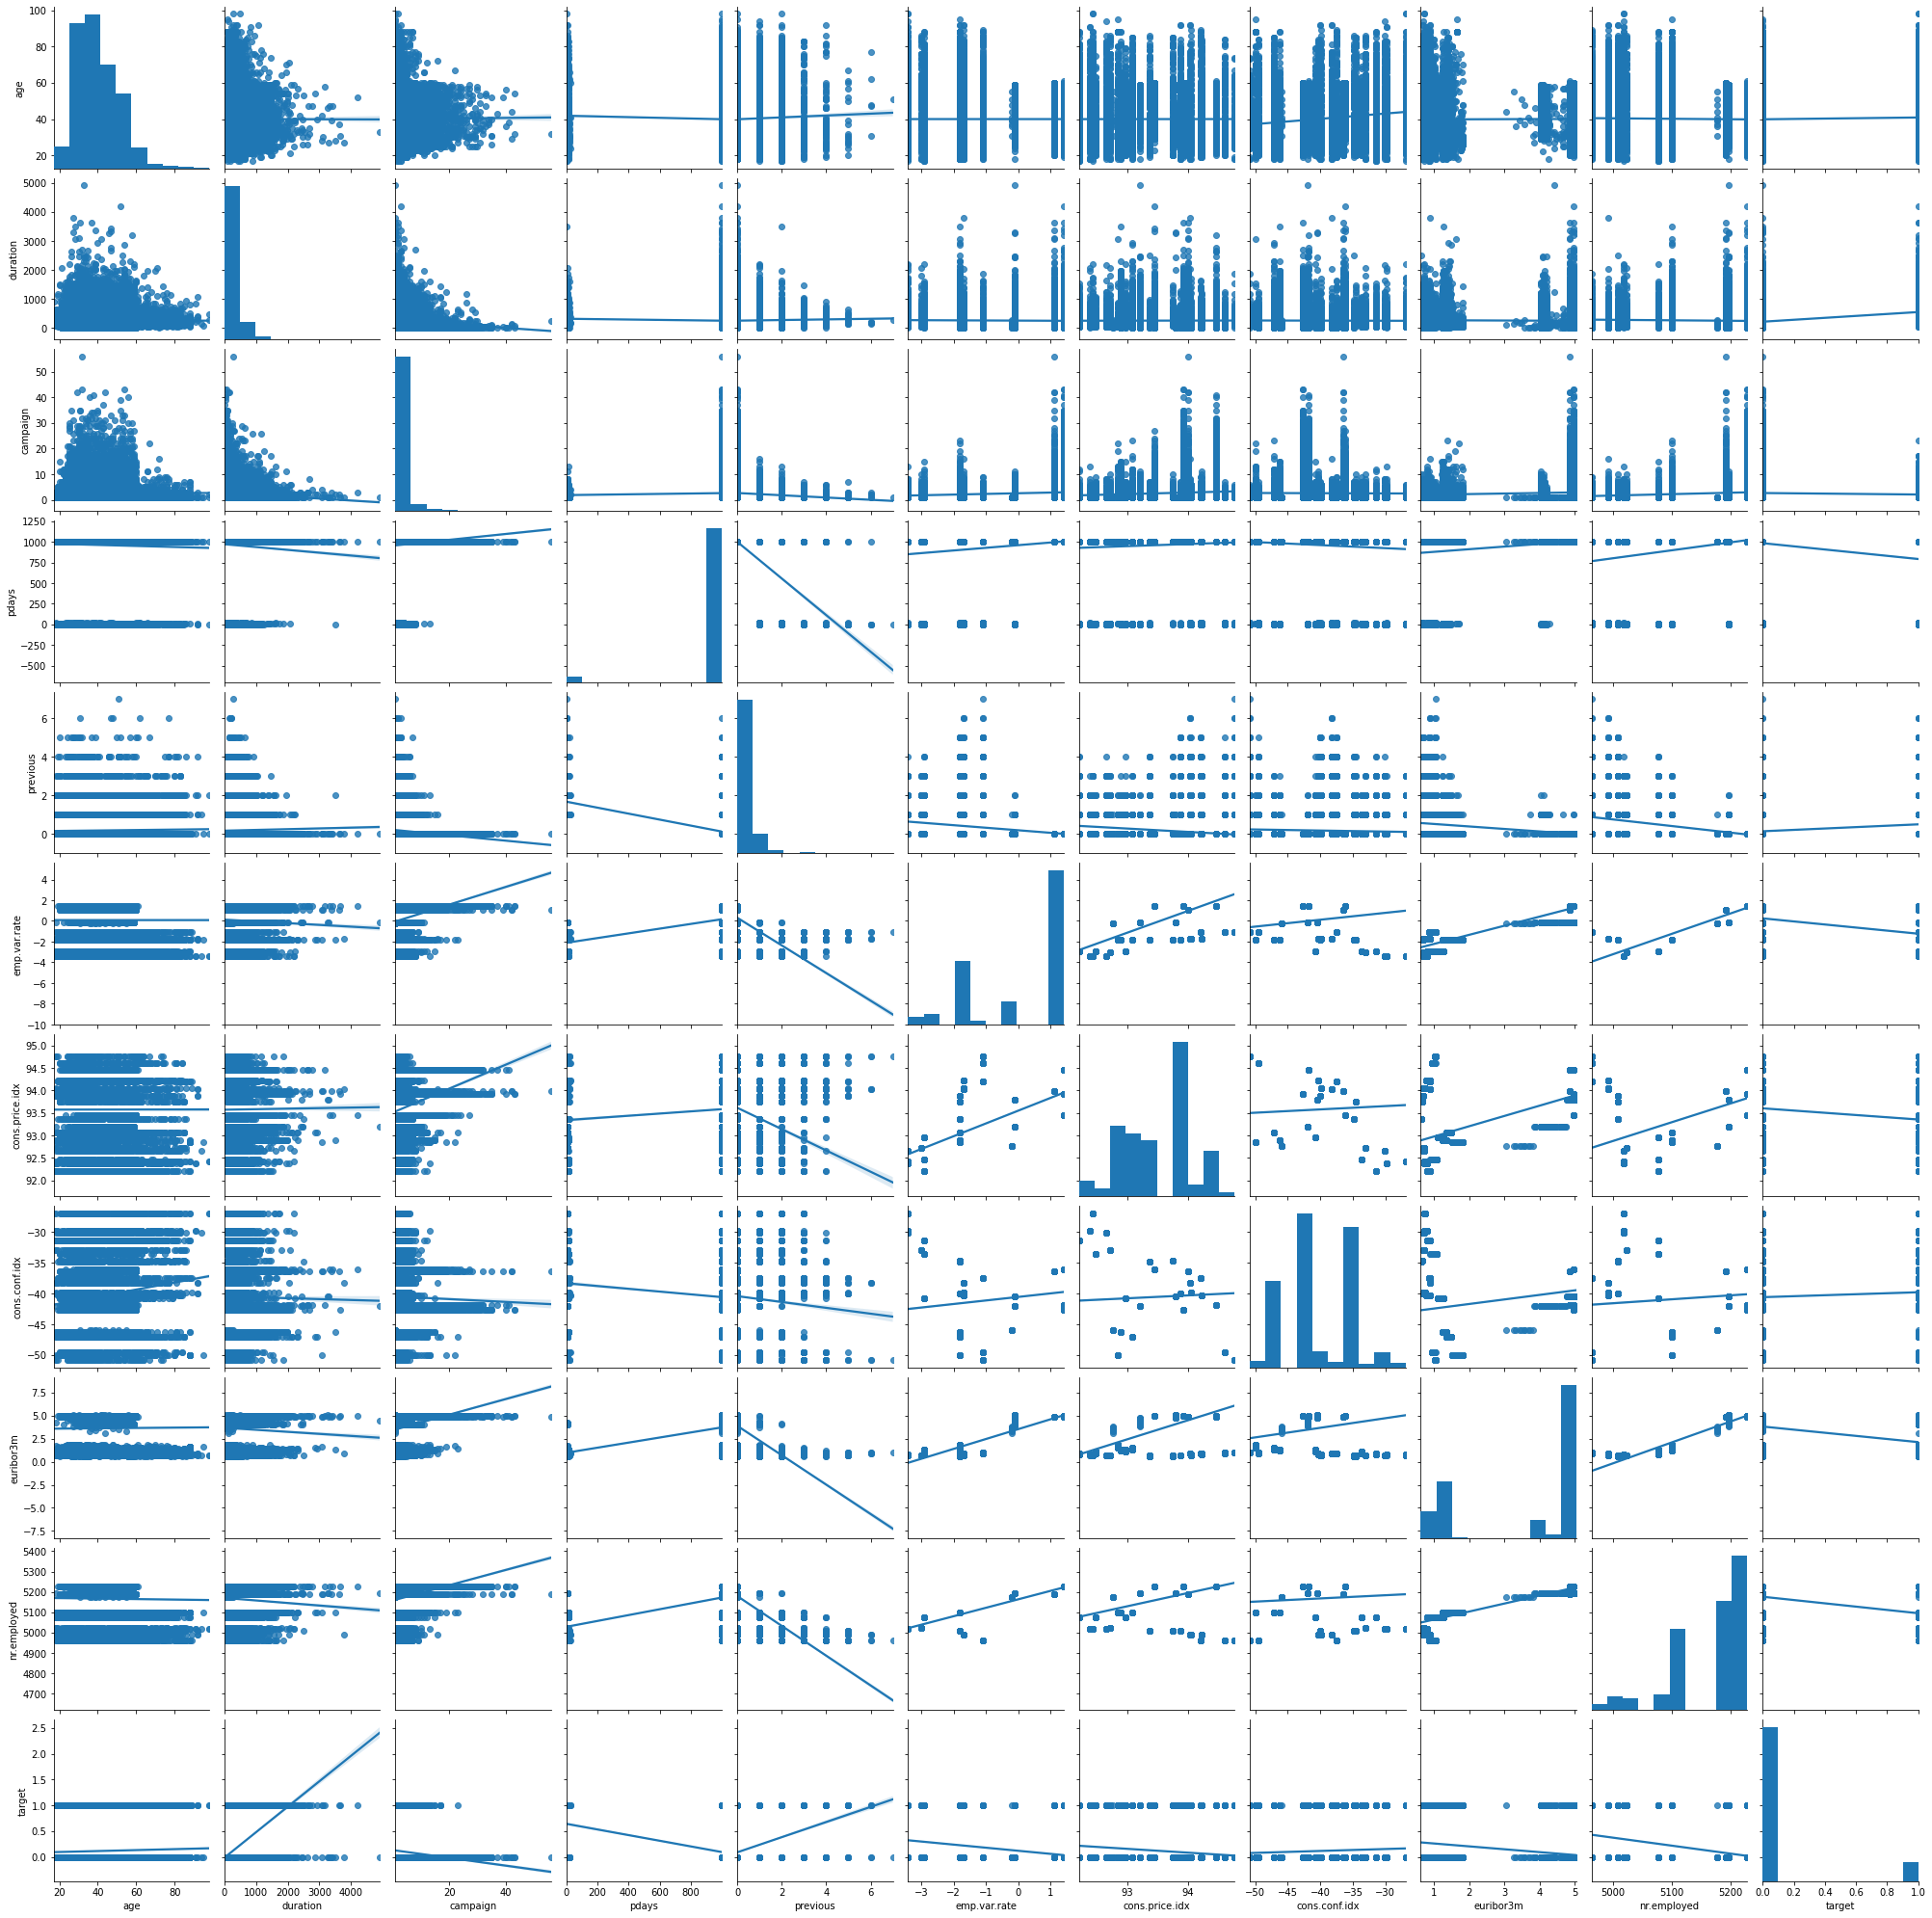

In [ ]:
## mutual dependencies

df_numeric = dataset.select_dtypes(include=np.number)

sns.pairplot(data=df_numeric,kind='reg')

plt.show()

Conclusions:
* binary columns such as loan, housing, default should be turned to 0-1
* categorical columns should be encoded using one-hot encoding

#Data Preperation

Categorical Columns

Checking how does look like distribution of each category

In [ ]:
non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [ ]:
for column in non_numeric_columns:
  print(f'Column name: {column}')
  print()
  print(dataset[column].value_counts())
  print()
  print("Category share (%)")
  print(dataset[column].value_counts()/dataset['job'].count()*100)
  print()

Column name: job

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Category share (%)
admin.           25.303486
blue-collar      22.467709
technician       16.371273
services          9.636302
management        7.099155
retired           4.175974
entrepreneur      3.535010
self-employed     3.450034
housemaid         2.573565
unemployed        2.461882
student           2.124405
unknown           0.801204
Name: job, dtype: float64

Column name: marital

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Category share (%)
married     60.522482
single      28.085850
divorced    11.197436
unknown      0.194231
Name: marital, dtype: float64

Column name: education

university.degree      121

#### Converting categorical attributes into numbers

In [ ]:
dataset.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
9372,60,self-employed,married,professional.course,unknown,no,no,telephone,jun,fri,162,1,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,0
15568,21,blue-collar,single,basic.9y,no,no,no,cellular,jul,fri,127,2,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,0
8356,32,blue-collar,married,basic.6y,no,unknown,unknown,telephone,jun,tue,31,5,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
10171,43,blue-collar,married,basic.4y,no,unknown,unknown,telephone,jun,thu,1618,2,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,1
18469,25,technician,single,high.school,no,no,no,cellular,jul,thu,27,16,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0


In [ ]:
dataset['default'].replace({'no':0,'yes':1},inplace=True)

In [ ]:
dataset['housing'].replace({'no':0,'yes':1},inplace=True)

In [ ]:
dataset['loan'].replace({'no':0,'yes':1},inplace=True)

# Data Cleaning

Remove unknown values as they make same noise only

In [ ]:
dataset.shape

(41188, 21)

In [ ]:
dataset = dataset[dataset['job']!='unknown']

In [ ]:
dataset.shape

(40858, 21)

In [ ]:
dataset = dataset[dataset['marital']!='unknown']

In [ ]:
dataset.shape

(40787, 21)

In [ ]:
dataset = dataset[dataset['housing']!='unknown']

In [ ]:
dataset.shape

(39803, 21)

In [ ]:
dataset = dataset[dataset['loan']!='unknown']

In [ ]:
dataset.shape

(39803, 21)

In [ ]:
dataset = dataset[dataset['education']!='unknown']

dataset = dataset[dataset['education']!='illiterate']

In [ ]:
dataset.shape

(38227, 21)

In [ ]:
#dataset = dataset[dataset['default']!='unknown']

#### Drop not used columns

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38227 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38227 non-null  int64  
 1   job             38227 non-null  object 
 2   marital         38227 non-null  object 
 3   education       38227 non-null  object 
 4   default         38227 non-null  object 
 5   housing         38227 non-null  object 
 6   loan            38227 non-null  object 
 7   contact         38227 non-null  object 
 8   month           38227 non-null  object 
 9   day_of_week     38227 non-null  object 
 10  duration        38227 non-null  int64  
 11  campaign        38227 non-null  int64  
 12  pdays           38227 non-null  int64  
 13  previous        38227 non-null  int64  
 14  poutcome        38227 non-null  object 
 15  emp.var.rate    38227 non-null  float64
 16  cons.price.idx  38227 non-null  float64
 17  cons.conf.idx   38227 non-null 

In [ ]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

In [ ]:
#dataset.drop([ 'duration','default','campaign','nr.employed','cons.price.idx','cons.conf.idx','emp.var.rate'  ],axis=1,inplace=True)
dataset.drop(['duration','default'],axis=1,inplace=True)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38227 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38227 non-null  int64  
 1   job             38227 non-null  object 
 2   marital         38227 non-null  object 
 3   education       38227 non-null  object 
 4   housing         38227 non-null  object 
 5   loan            38227 non-null  object 
 6   contact         38227 non-null  object 
 7   month           38227 non-null  object 
 8   day_of_week     38227 non-null  object 
 9   campaign        38227 non-null  int64  
 10  pdays           38227 non-null  int64  
 11  previous        38227 non-null  int64  
 12  poutcome        38227 non-null  object 
 13  emp.var.rate    38227 non-null  float64
 14  cons.price.idx  38227 non-null  float64
 15  cons.conf.idx   38227 non-null  float64
 16  euribor3m       38227 non-null  float64
 17  nr.employed     38227 non-null 

#Feature Engineering

Let's check if we are able to simplify a bit our categories

In [ ]:
for column in dataset.select_dtypes(exclude=np.number).columns:
  print(dataset[column].value_counts())
  print() 

admin.           9936
blue-collar      8552
technician       6380
services         3716
management       2728
retired          1574
entrepreneur     1358
self-employed    1346
housemaid         986
unemployed        963
student           688
Name: job, dtype: int64

married     23168
single      10759
divorced     4300
Name: marital, dtype: int64

university.degree      11821
high.school             9244
basic.9y                5856
professional.course     5100
basic.4y                4002
basic.6y                2204
Name: education, dtype: int64

1    20568
0    17659
Name: housing, dtype: int64

0    32271
1     5956
Name: loan, dtype: int64

cellular     24426
telephone    13801
Name: contact, dtype: int64

may    12791
jul     6625
aug     5817
jun     4846
nov     3895
apr     2434
oct      659
sep      502
mar      497
dec      161
Name: month, dtype: int64

thu    8005
mon    7926
wed    7600
tue    7476
fri    7220
Name: day_of_week, dtype: int64

nonexistent    33050
failure 

In [ ]:
dataset['education'].replace({'basic.9y':'basic','basic.4y':'basic','basic.6y':'basic'}, inplace=True)

dataset['job'].replace({'technician':'tech-services','services':'tech-services',
                        'entrepreneur':'self-employed','admin.':'admin&management'
                        ,'management':'admin&management','retired':'non-active','unemployed':'non-active'},inplace=True)

dataset['marital'].replace({'divorced':'single'},inplace=True)



In [ ]:
for column in dataset.select_dtypes(exclude=np.number).columns:
  print(dataset[column].value_counts())
  print() 

admin&management    12664
tech-services       10096
blue-collar          8552
self-employed        2704
non-active           2537
housemaid             986
student               688
Name: job, dtype: int64

married    23168
single     15059
Name: marital, dtype: int64

basic                  12062
university.degree      11821
high.school             9244
professional.course     5100
Name: education, dtype: int64

1    20568
0    17659
Name: housing, dtype: int64

0    32271
1     5956
Name: loan, dtype: int64

cellular     24426
telephone    13801
Name: contact, dtype: int64

may    12791
jul     6625
aug     5817
jun     4846
nov     3895
apr     2434
oct      659
sep      502
mar      497
dec      161
Name: month, dtype: int64

thu    8005
mon    7926
wed    7600
tue    7476
fri    7220
Name: day_of_week, dtype: int64

nonexistent    33050
failure         3935
success         1242
Name: poutcome, dtype: int64



Conclusion

In our dataset there are two columns which should have been taken into account more precisely as they can help us identify customers into new and existing.

Column **poutcome** as outcome of the previous marketing campaign and column **pdays** as number of days that passed by after the client was last contacted from a previous campaign

In [ ]:
poutcome = dataset['poutcome'].value_counts()
poutcome['nonexistent']

33050

In [ ]:
pdays = dataset['pdays'].value_counts()[:5]
pdays[999]

36862

In [ ]:
poutcome['nonexistent']-pdays[999]

-3812

The quantity of new customers shoudl be equal compering poutcome and pdays. Let's check what could happened that makes differences

As we assumed that pdays '999' is related to new customers data, we could check if there are other values in poutcome where '999' is assigned 

In [ ]:
dataset['poutcome'].loc[(dataset['pdays']==999)&(dataset['poutcome']!='nonexistent')].value_counts()

failure    3812
Name: poutcome, dtype: int64

There 3812 itmes in out dataset that have wrongly assigned category to pdays

As these items have wrongly assigned pdays to '999' let's replace this with NAN values

In [ ]:
indexes = dataset.loc[(dataset['pdays']==999)&(dataset['poutcome']!='nonexistent')]['pdays'].index.values
indexes

array([24019, 24076, 24102, ..., 41170, 41173, 41187])

In [ ]:
dataset.loc[indexes,'pdays'] = np.nan

As these NAN values is about 10% of data, we can drop missing values to get more accurate predictions 

In [ ]:
dataset.shape

(38227, 19)

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.shape

(34415, 19)

In [ ]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'target'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34415 entries, 0 to 41186
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34415 non-null  int64  
 1   job             34415 non-null  object 
 2   marital         34415 non-null  object 
 3   education       34415 non-null  object 
 4   housing         34415 non-null  object 
 5   loan            34415 non-null  object 
 6   contact         34415 non-null  object 
 7   month           34415 non-null  object 
 8   day_of_week     34415 non-null  object 
 9   campaign        34415 non-null  int64  
 10  pdays           34415 non-null  float64
 11  previous        34415 non-null  int64  
 12  poutcome        34415 non-null  object 
 13  emp.var.rate    34415 non-null  float64
 14  cons.price.idx  34415 non-null  float64
 15  cons.conf.idx   34415 non-null  float64
 16  euribor3m       34415 non-null  float64
 17  nr.employed     34415 non-null 

#Modeling

Before we start doing predictions we have to convert categorical variabels into numbers

In [ ]:
dataset = pd.get_dummies(data=dataset,
                         columns=['housing','loan','job','marital','education','contact','month','day_of_week','poutcome'],
                         prefix_sep='_',drop_first=True)

In [ ]:
dataset.sample(10)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,housing_1,loan_1,job_blue-collar,job_housemaid,job_non-active,job_self-employed,job_student,job_tech-services,marital_single,education_high.school,education_professional.course,education_university.degree,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
31098,32,2,999.0,0,-1.8,92.893,-46.2,1.334,5099.1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
17180,53,1,999.0,0,1.4,93.918,-42.7,4.962,5228.1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
38763,32,2,999.0,0,-3.4,92.649,-30.1,0.714,5017.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
5990,38,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
32993,32,2,999.0,0,-1.8,92.893,-46.2,1.299,5099.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
15334,48,2,999.0,0,1.4,93.918,-42.7,4.957,5228.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
40358,21,3,9.0,2,-1.7,94.027,-38.3,0.899,4991.6,1,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
30396,38,1,999.0,0,-1.8,93.075,-47.1,1.365,5099.1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
33119,32,6,999.0,0,-1.8,92.893,-46.2,1.291,5099.1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
13125,32,1,999.0,0,1.4,93.918,-42.7,4.962,5228.1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
dataset.shape

(34415, 38)

#Scenario 1 -> Unbalanced data

Let's test classifiers using unbalanced target variable

In [ ]:
features = dataset.columns
features= features.drop('target').tolist()
features

['age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'housing_1',
 'loan_1',
 'job_blue-collar',
 'job_housemaid',
 'job_non-active',
 'job_self-employed',
 'job_student',
 'job_tech-services',
 'marital_single',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [ ]:
dataset[features][:10]

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housing_1,loan_1,job_blue-collar,job_housemaid,job_non-active,job_self-employed,job_student,job_tech-services,marital_single,education_high.school,education_professional.course,education_university.degree,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
5,45,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
6,59,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
8,24,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
9,25,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
11,25,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
X = dataset[features]
X = np.array(X)

y = np.array(dataset['target'])


In [ ]:
### assign data to scenario 1

X_1 = X
y_1 = y

In [ ]:
scaler = StandardScaler()

X_scaled= X_1

In [ ]:
### Train Test Split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y_1, test_size=0.3, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24090, 37) (24090,)
Test set: (10325, 37) (10325,)


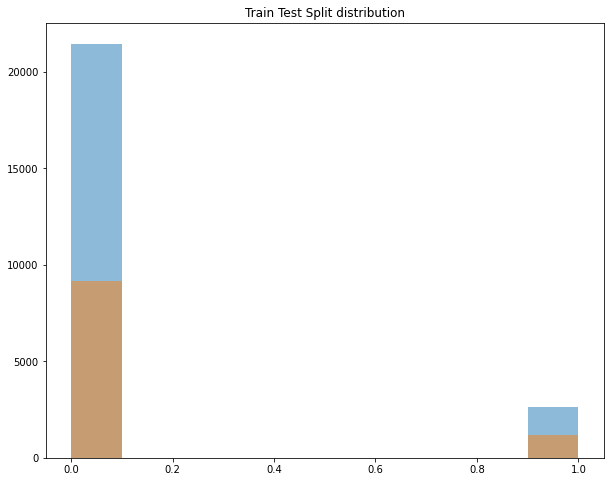

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(y_train, alpha=0.5)
plt.hist(y_test,alpha=0.5)
plt.title('Train Test Split distribution');

In [ ]:
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

###Logistic Regression

In [ ]:
pipe= Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1,max_iter=1000))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

{'classifier__C': 0.1}

###LinearSVC

In [ ]:

pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.1}

### DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe_3 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 10,
 'classifier__min_samples_split': 2,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

### RandomForest

In [ ]:

pipe_4 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_4 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 10}

### BaggingClassifier

In [ ]:

pipe_5 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_samples': 20, 'classifier__n_estimators': 10}

### AdaBoostClassifier

In [ ]:

pipe_6 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', AdaBoostClassifier(
                        DecisionTreeClassifier(max_depth=1), 
                        n_estimators=1, learning_rate=0.5, 
                        algorithm="SAMME.R", random_state=42)
                   )
                  ])


param_grid_6 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1],
              'classifier__base_estimator__max_depth':[1,5,7,10]
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__base_estimator__max_depth': 1,
 'classifier__learning_rate': 0.5,
 'classifier__n_estimators': 200}

### ExtraTrees

In [ ]:

pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 50}

### GradientBoosting

In [ ]:

pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_8 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}

### XGBoost

In [ ]:

pipe_9 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_9 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}

## Models

In [ ]:

models = []

models.append(('LogisticRegression', grid.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('DecisionTree', grid_3.best_estimator_))
models.append(('RandomForest', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))
models.append(('AdaBoost', grid_6.best_estimator_))
models.append(('ExtraTrees', grid_7.best_estimator_))
models.append(('GradientBoosting', grid_8.best_estimator_))
models.append(('XGBoost', grid_9.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))
    elif (name == 'Vo hard'):
        pass
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    elif (name == 'Vo hard'):
        roc_auc_score.append(0)
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
    print()

LogisticRegression
precision_score: 0.6674876847290641
recall_score: 0.23442906574394465
f1_score: 0.34699103713188223
accuracy_score: 0.9012106537530267
roc_auc_score: 0.790928917999231

SVM linear
precision_score: 0.6624365482233503
recall_score: 0.22577854671280276
f1_score: 0.3367741935483871
accuracy_score: 0.9004358353510896
roc_auc_score: 0.7889152122712269

DecisionTree
precision_score: 0.6559356136820925
recall_score: 0.2820069204152249
f1_score: 0.39443436176648516
accuracy_score: 0.9030508474576271
roc_auc_score: 0.7514561251033552

RandomForest
precision_score: 0.6804597701149425
recall_score: 0.2560553633217993
f1_score: 0.3720930232558139
accuracy_score: 0.9032445520581114
roc_auc_score: 0.7873108235550738

BaggingClassifier
precision_score: 0.5555555555555556
recall_score: 0.012975778546712802
f1_score: 0.025359256128486895
accuracy_score: 0.8883292978208233
roc_auc_score: 0.6946782844706532

AdaBoost
precision_score: 0.6636363636363637
recall_score: 0.25259515570934254


In [ ]:
# import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
#df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest'])
df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest','BaggingClassifier','AdaBoost','ExtraTrees','GradientBoosting','XGBoost'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,LogisticRegression,0.667488,0.234429,0.346991,0.901211,0.790929
1,SVM linear,0.662437,0.225779,0.336774,0.900436,0.788915
2,DecisionTree,0.655936,0.282007,0.394434,0.903051,0.751456
3,RandomForest,0.680460,0.256055,0.372093,0.903245,0.787311
4,BaggingClassifier,0.555556,0.012976,0.025359,0.888329,0.694678
5,AdaBoost,0.663636,0.252595,0.365915,0.901985,0.793735
6,ExtraTrees,0.697674,0.207612,0.320000,0.901211,0.789211
7,GradientBoosting,0.662526,0.276817,0.390482,0.903245,0.796424
8,XGBoost,0.677419,0.272491,0.388649,0.904019,0.800135


LogisticRegression
SVM linear
DecisionTree
RandomForest
BaggingClassifier
AdaBoost
ExtraTrees
GradientBoosting
XGBoost


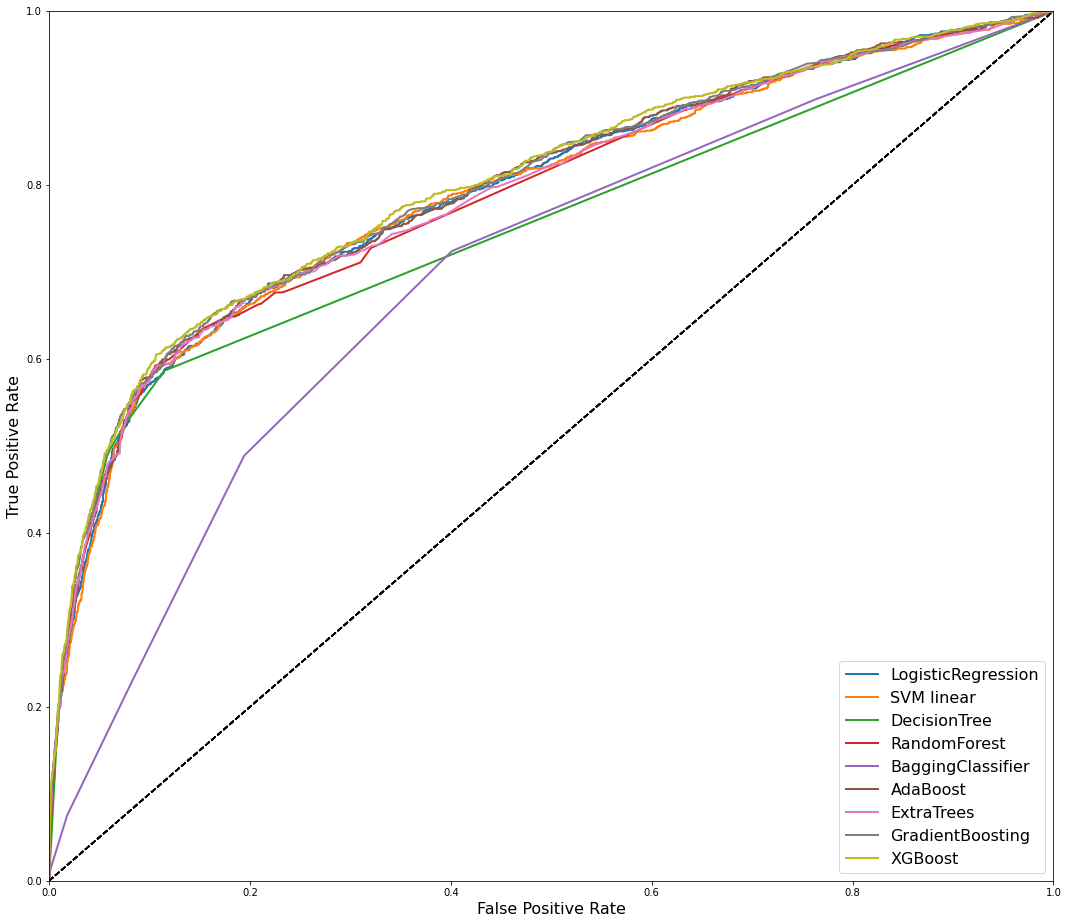

In [ ]:
# from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(18, 16))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()

Conclusion

Due to the fact classes are unbalances **accuracy** is not a good metric to measure prediction performance. 

Focusing on F1 and ROC-AUC is better solution.

Best model confusion matrix results

Decision Tree classifier scored the best F1 result.

In [ ]:
y_pred = grid_3.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9169
           1       0.66      0.28      0.39      1156

    accuracy                           0.90     10325
   macro avg       0.79      0.63      0.67     10325
weighted avg       0.89      0.90      0.89     10325



The precision and recall for class 0 (clients not interested of taking bank term) is pretty high, but for class 1 (clients interested of taking bank term) it’s low. Of all clients which our best model predicted as class 1, only 66% were actually of class 1. And of all actual class 1 clients, our model correctly identified only 28%.

The F1 score for the class 0 is really high, while for the class 1 it’s low 39%. 

All in all, the model doesn’t seem to be very good in predicting the clients who took bank term. The main cause of it is fact that classes are unbalanced.

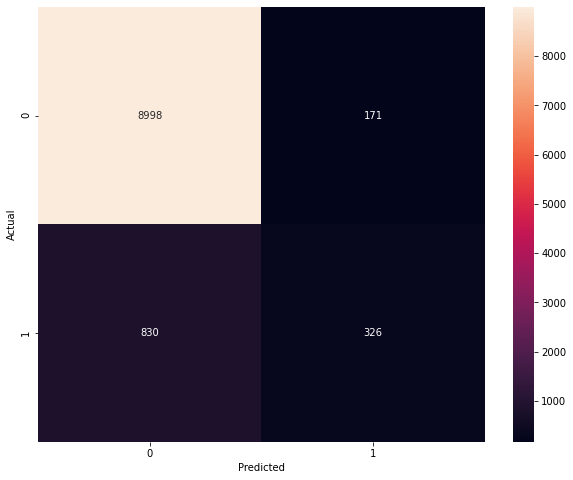

In [ ]:
data = {'Actual':y_test.tolist(),'Predicted':y_pred.tolist()}

df = pd.DataFrame(data,columns=['Actual','Predicted'])

confusion_matrix = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True,fmt='d')
plt.show()

The best performed model accurately identified true positives 326 times out of 1156, but it also got 171 false positives. 

This makes F1 score low.

#Scenario 2 -> using SMOTE technique


The target variable was highly unbalanced and the results  of identifying clients interested in bank term were very poor.  
To improve results I decided to use technique known as SMOTE: Synthetic Minority Over-sampling Technique for oversampling imbalanced classification datasets.

In [ ]:
### assign data to scenario 2

X_2 = X
y_2 = y

In [ ]:
###Scaling data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


In [ ]:
### Train Test Split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y_2, test_size=0.3, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24090, 37) (24090,)
Test set: (10325, 37) (10325,)


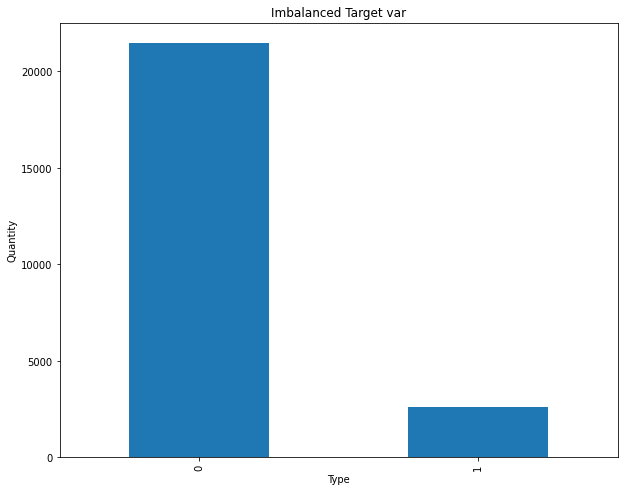

In [ ]:
plt.figure(figsize=(10,8))
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title('Imbalanced Target var')
plt.xlabel('Type')
plt.ylabel('Quantity');

Test Logistic Regression model with default parameters

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)


In [ ]:

print(classification_report(y_true=y_test,y_pred=y_pred))


              precision    recall  f1-score   support

           0       0.91      0.98      0.95      9169
           1       0.66      0.24      0.35      1156

    accuracy                           0.90     10325
   macro avg       0.79      0.61      0.65     10325
weighted avg       0.88      0.90      0.88     10325



The precision and recall for class 1 are low compering with class 0.

Of all clients predicted as class 1 only 66% are actually class 1 and of all actual class 1 clients model correctly identified only 24%

F1 measure for Logistic Regression model scores 35%

Check if using technique SMOTE improve model predictions

In [ ]:

smt =  SMOTE()

X_train, y_train = smt.fit_sample(X_train,y_train,)

print(np.bincount(y_train))

lr = LogisticRegression(max_iter=10000)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)



[21463 21463]


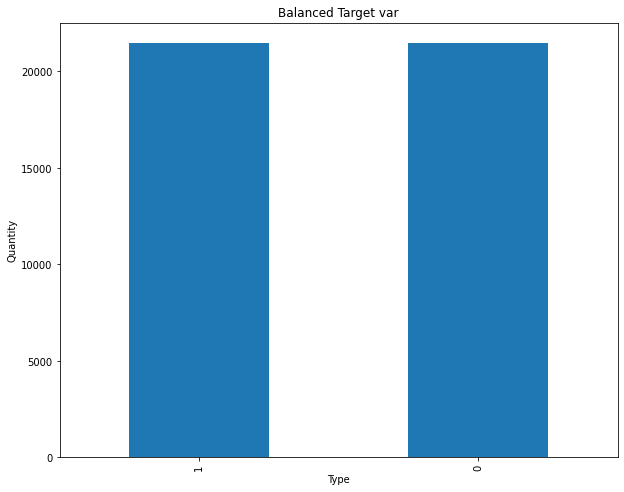

In [ ]:
plt.figure(figsize=(10,8))
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title('Balanced Target var')
plt.xlabel('Type')
plt.ylabel('Quantity');

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      9169
           1       0.35      0.62      0.45      1156

    accuracy                           0.83     10325
   macro avg       0.65      0.74      0.67     10325
weighted avg       0.88      0.83      0.85     10325



Using SMOTE techique for Logistic Regression model with default parameters increases F1 about 10%

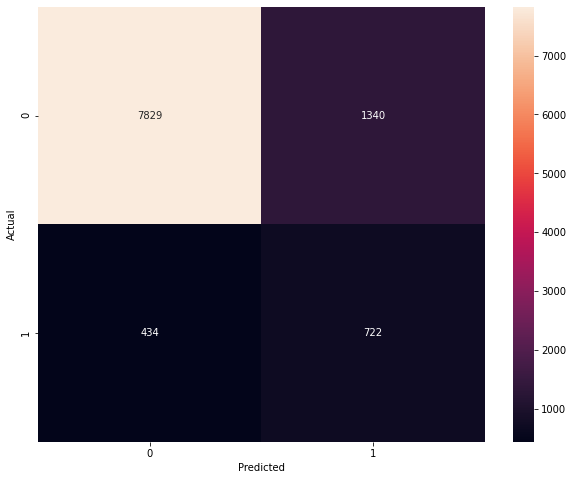

In [ ]:
data = {'Actual':y_test.tolist(),'Predicted':y_pred.tolist()}

df = pd.DataFrame(data,columns=['Actual','Predicted'])

confusion_matrix = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True,fmt='d')
plt.show()


The Logistic Regression model with default parameters accurately identified true positives 722 times out of 1156, but it also got 1340 false positives. 

In [ ]:
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

###Logistic Regression

In [ ]:
pipe= Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1,max_iter=1000))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

{'classifier__C': 10}

###LinearSVC

In [ ]:

pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.01}

### DecisionTree

In [ ]:
DecisionTreeClassifier()
pipe_3 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_depth': 11,
 'classifier__max_leaf_nodes': 40,
 'classifier__min_samples_split': 2,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

### RandomForest

In [ ]:

pipe_4 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_4 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 10}

### BaggingClassifier

In [ ]:

pipe_5 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_samples': 20, 'classifier__n_estimators': 100}

### AdaBoostClassifier

In [ ]:

pipe_6 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', AdaBoostClassifier(
                        DecisionTreeClassifier(max_depth=1), 
                        n_estimators=1, learning_rate=0.5, 
                        algorithm="SAMME.R", random_state=42)
                   )
                  ])


param_grid_6 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1],
              'classifier__base_estimator__max_depth':[1,5,7,10]
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__base_estimator__max_depth': 5,
 'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 200}

### ExtraTrees

In [ ]:

pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 50}

### GradientBoosting

In [ ]:

pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_8 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 0.5, 'classifier__n_estimators': 200}

### XGBoost

In [ ]:

pipe_9 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_9 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.9, 'classifier__n_estimators': 200}

## Models

In [ ]:
models = []

models.append(('LogisticRegression', grid.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('DecisionTree', grid_3.best_estimator_))
models.append(('RandomForest', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))
models.append(('AdaBoost', grid_6.best_estimator_))
models.append(('ExtraTrees', grid_7.best_estimator_))
models.append(('GradientBoosting', grid_8.best_estimator_))
models.append(('XGBoost', grid_9.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))
    elif (name == 'Vo hard'):
        pass
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    elif (name == 'Vo hard'):
        roc_auc_score.append(0)
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
    print()

LogisticRegression
precision_score: 0.3498542274052478
recall_score: 0.6228373702422145
f1_score: 0.44803982576228996
accuracy_score: 0.82818401937046
roc_auc_score: 0.7869838699755947

SVM linear
precision_score: 0.3371824480369515
recall_score: 0.6314878892733564
f1_score: 0.4396266184884071
accuracy_score: 0.8197578692493946
roc_auc_score: 0.7868530130675765

DecisionTree
precision_score: 0.497883149872989
recall_score: 0.5086505190311419
f1_score: 0.503209242618742
accuracy_score: 0.8875544794188862
roc_auc_score: 0.7647678672041077

RandomForest
precision_score: 0.411836485661989
recall_score: 0.5839100346020761
f1_score: 0.4830053667262969
accuracy_score: 0.8600484261501211
roc_auc_score: 0.7828443291503151

BaggingClassifier
precision_score: 0.2801470588235294
recall_score: 0.6591695501730104
f1_score: 0.39318885448916413
accuracy_score: 0.7722033898305085
roc_auc_score: 0.7647441865379848

AdaBoost
precision_score: 0.5883333333333334
recall_score: 0.305363321799308
f1_score: 0.

In [ ]:

d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest','BaggingClassifier','AdaBoost','ExtraTrees','GradientBoosting','XGBoost'])

df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,LogisticRegression,0.349854,0.622837,0.448040,0.828184,0.786984
1,SVM linear,0.337182,0.631488,0.439627,0.819758,0.786853
2,DecisionTree,0.497883,0.508651,0.503209,0.887554,0.764768
3,RandomForest,0.411836,0.583910,0.483005,0.860048,0.782844
4,BaggingClassifier,0.280147,0.659170,0.393189,0.772203,0.764744
5,AdaBoost,0.588333,0.305363,0.402050,0.898305,0.754164
6,ExtraTrees,0.352740,0.623702,0.450625,0.829734,0.790320
7,GradientBoosting,0.584142,0.312284,0.406990,0.898111,0.788069
8,XGBoost,0.571429,0.294118,0.388350,0.896271,0.780523


LogisticRegression
SVM linear
DecisionTree
RandomForest
BaggingClassifier
AdaBoost
ExtraTrees
GradientBoosting
XGBoost


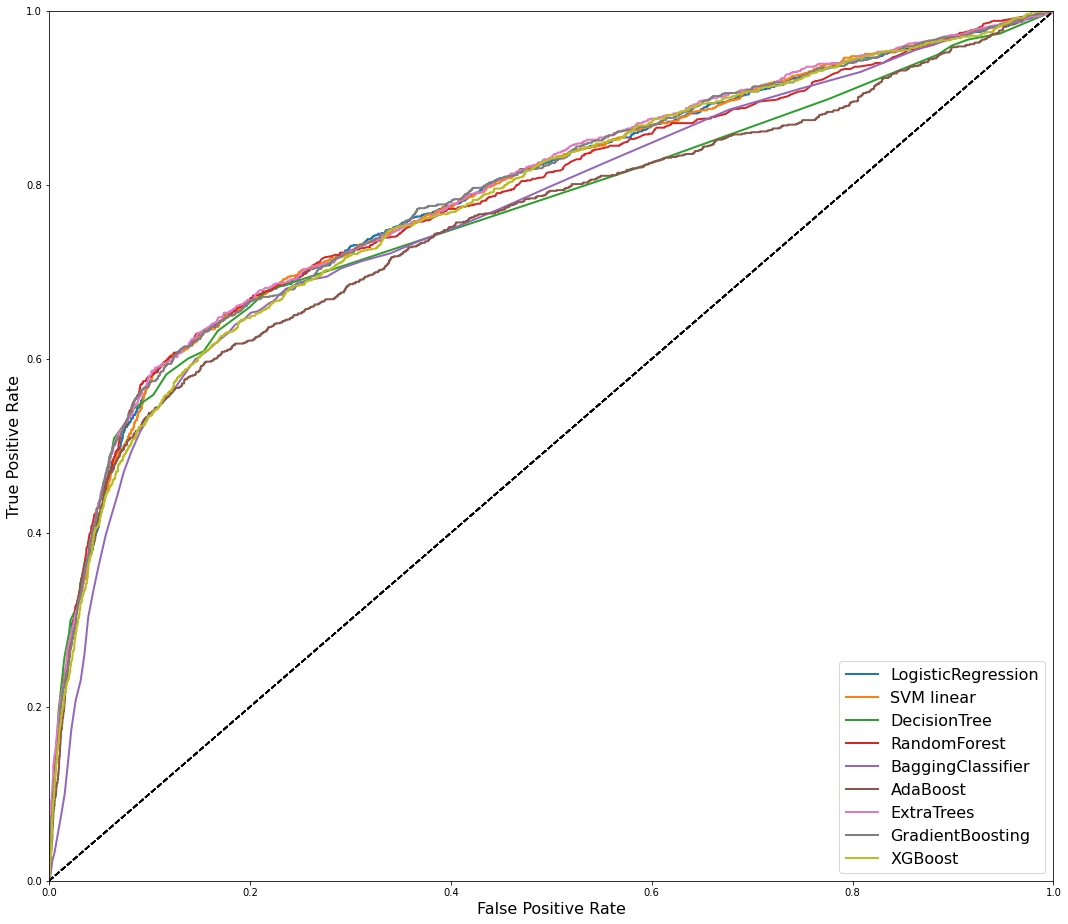

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(18, 16))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()

Best model confusion matrix results

Decision Tree classifier scored also best F1 on balanced classes.

In [ ]:
y_pred = grid_3.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9169
           1       0.50      0.51      0.50      1156

    accuracy                           0.89     10325
   macro avg       0.72      0.72      0.72     10325
weighted avg       0.89      0.89      0.89     10325



The precision and recall for class 0 (clients not interested of taking bank term) is still pretty high, but for class 1 (clients interested of taking bank term) it’s low. Of all clients which our best model predicted as class 1, only 50% were actually of class 1. And of all actual class 1 clients, our model correctly identified increased to 51%.

The F1 score increased about 11% compering with modeling on unbalanced classes.


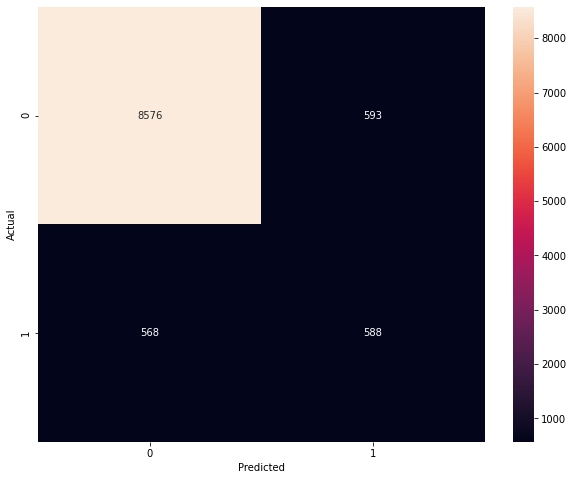

In [ ]:
data = {'Actual':y_test.tolist(),'Predicted':y_pred.tolist()}

df = pd.DataFrame(data,columns=['Actual','Predicted'])

confusion_matrix = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True,fmt='d')
plt.show()

The best performed model accurately identified true positives 588 times out of 1156, but it also got 593 false positives.


In [ ]:
grid_3.best_params_

{'classifier__max_depth': 11,
 'classifier__max_leaf_nodes': 40,
 'classifier__min_samples_split': 2,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [ ]:
model_dc = DecisionTreeClassifier(max_depth=11,max_leaf_nodes=40,min_samples_split=2)
model_dc.fit(X_train,y_train).predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
def plot_feature_importances(model):
    '''
    Visualization for future importance
    '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), features) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

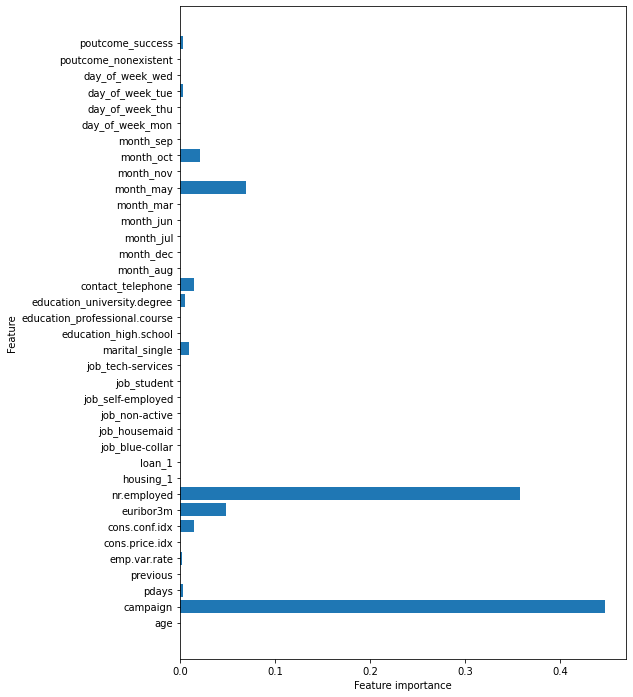

In [ ]:
plot_feature_importances(model_dc)

Decision Tree classifier got the best results, above graphical description of features which have the most influence. 

In [ ]:
dataset.shape

(34415, 38)

#Scenario 3 -> Upsampled data

As dataset is unbalanced let's test other approaches like unsampling and downsampling

In [ ]:
#We split the imbalanced dataset into 2 separate datasets
df_majority = dataset[dataset.target==0]
df_minority = dataset[dataset.target==1]

#Then upsampling the minority class

df_minority_upsampled = resample(df_minority, replace=True, n_samples=30632, random_state=123)

#And join two datasets
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.target.value_counts()

1    30632
0    30632
Name: target, dtype: int64

In [ ]:
y_upsamp = df_upsampled.target
X_upsamp = df_upsampled.drop('target', axis=1)

In [ ]:
y_upsamp.value_counts()

1    30632
0    30632
Name: target, dtype: int64

In [ ]:
dataset.target.value_counts()

0    30632
1     3783
Name: target, dtype: int64

## Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_upsamp, y_upsamp, test_size=0.3, random_state=123)

In [ ]:
seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

##Logistic Regression

In [ ]:
pipe= Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1,max_iter=1000))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

{'classifier__C': 0.1}

##LinearSVC

In [ ]:

pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.01}

##DecisionTree

In [ ]:
DecisionTreeClassifier()
pipe_3 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 40,
 'classifier__min_samples_split': 2,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

##RandomForest

In [ ]:
pipe_4 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_4 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 100}

##BaggingClassifier

In [ ]:
pipe_5 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_samples': 20, 'classifier__n_estimators': 100}

##ExtraTrees

In [ ]:
pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 50}

##GradientBoosting

In [ ]:
pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_8 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 1, 'classifier__n_estimators': 200}

##XGBoost

In [ ]:
pipe_9 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_9 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.9, 'classifier__n_estimators': 200}

##Models

In [ ]:

models = []

models.append(('LogisticRegression', grid.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('DecisionTree', grid_3.best_estimator_))
models.append(('RandomForest', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))
models.append(('ExtraTrees', grid_7.best_estimator_))
models.append(('GradientBoosting', grid_8.best_estimator_))
models.append(('XGBoost', grid_9.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))
    elif (name == 'Vo hard'):
        pass
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    elif (name == 'Vo hard'):
        roc_auc_score.append(0)
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
    print()

LogisticRegression
precision_score: 0.8178514318941706
recall_score: 0.6131211857018308
f1_score: 0.7008408595453129
accuracy_score: 0.738683351468988
roc_auc_score: 0.7909322656708523

SVM linear
precision_score: 0.8128763980498996
recall_score: 0.6178073234524848
f1_score: 0.7020433436532508
accuracy_score: 0.7381936887921654
roc_auc_score: 0.7900511431385543

DecisionTree
precision_score: 0.8084759576202118
recall_score: 0.6486486486486487
f1_score: 0.7197968315394848
accuracy_score: 0.7478781284004352
roc_auc_score: 0.7994046573700757

RandomForest
precision_score: 0.8316181953765847
recall_score: 0.6076721883173496
f1_score: 0.7022227819406839
accuracy_score: 0.7427094668117519
roc_auc_score: 0.8014913439325687

BaggingClassifier
precision_score: 0.7772020725388601
recall_score: 0.6375326939843069
f1_score: 0.7004729689277376
accuracy_score: 0.7278019586507073
roc_auc_score: 0.7713732363814375

ExtraTrees
precision_score: 0.8048646420228116
recall_score: 0.6382955536181343
f1_scor

In [ ]:

d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest','BaggingClassifier','ExtraTrees','GradientBoosting','XGBoost'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,LogisticRegression,0.817851,0.613121,0.700841,0.738683,0.790932
1,SVM linear,0.812876,0.617807,0.702043,0.738194,0.790051
2,DecisionTree,0.808476,0.648649,0.719797,0.747878,0.799405
3,RandomForest,0.831618,0.607672,0.702223,0.742709,0.801491
4,BaggingClassifier,0.777202,0.637533,0.700473,0.727802,0.771373
5,ExtraTrees,0.804865,0.638296,0.711967,0.742165,0.796426
6,GradientBoosting,0.816141,0.705318,0.756694,0.773558,0.853790
7,XGBoost,0.822309,0.712620,0.763545,0.779652,0.860877


LogisticRegression
SVM linear
DecisionTree
RandomForest
BaggingClassifier
ExtraTrees
GradientBoosting
XGBoost


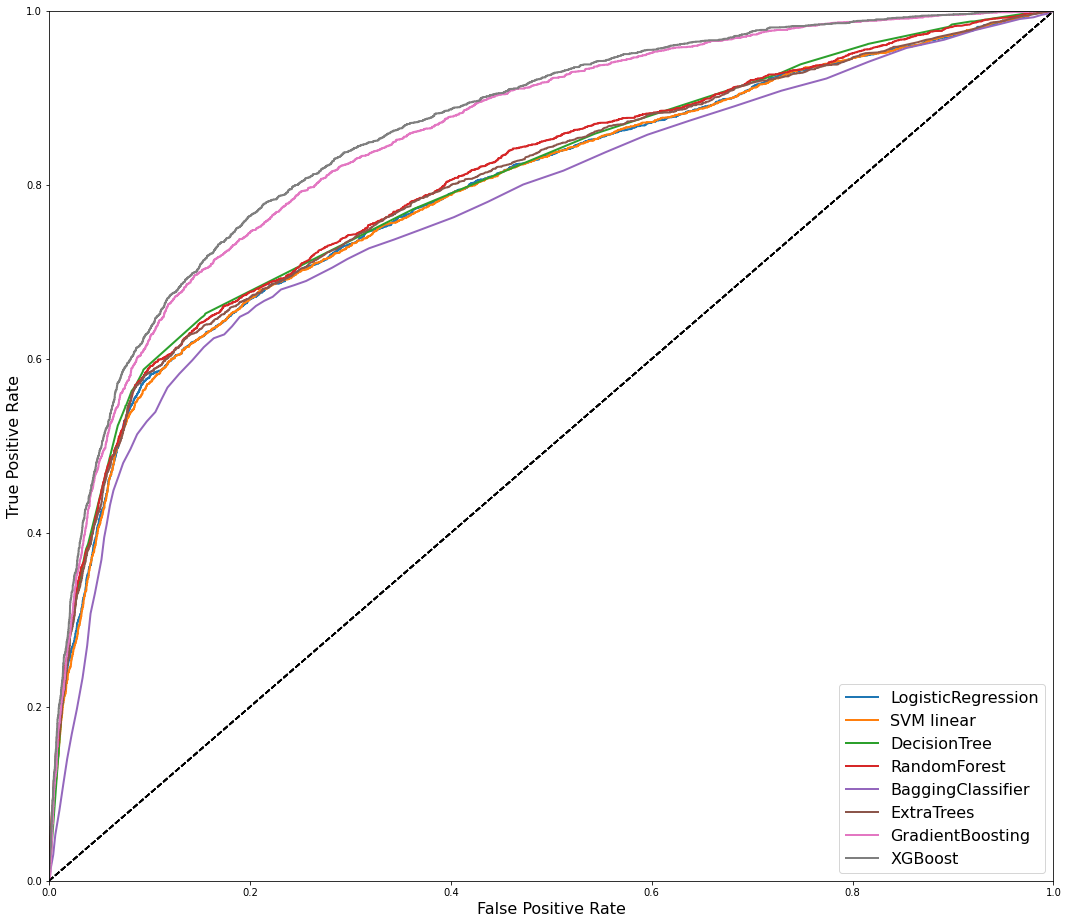

In [ ]:

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(18, 16))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()

Best model results

Xboost classifier scored also best F1 on unsampled data

In [ ]:
y_pred = grid_9.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.79      9204
           1       0.82      0.71      0.76      9176

    accuracy                           0.78     18380
   macro avg       0.78      0.78      0.78     18380
weighted avg       0.78      0.78      0.78     18380



The precision and recall for class 0 (clients not interested of taking bank term) is decreased compering to models with unbalanced data and SMOTE, for class 1 (clients interested of taking bank term) has clearly increased. Of all clients which our best model predicted as class 1, 82% were actually of class 1. And of all actual class 1 clients, our model correctly identified increased to 71%.

The F1 score increased about 26% compering with modeling using SMOTE technique.


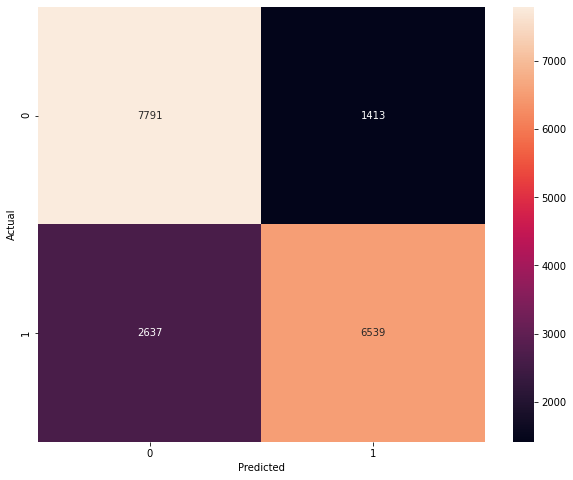

In [ ]:
data = {'Actual':y_test.tolist(),'Predicted':y_pred.tolist()}

df = pd.DataFrame(data,columns=['Actual','Predicted'])

confusion_matrix = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True,fmt='d')
plt.show()

The best performed model accurately identified true positives 6539 times out of 9176, but it also got 1413 false positives.

#Scenario 4 -> downsampled data

In [ ]:
# Let's now test if downsampling give us better results
df_majority_downsampled = resample(df_majority, replace=True, n_samples=3783, random_state=42)
#Join two datasets
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

df_downsampled.target.value_counts()

1    3783
0    3783
Name: target, dtype: int64

##Modeling

In [ ]:
y_downsamp = df_downsampled.target
X_downsamp = df_downsampled.drop('target', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_downsamp, y_downsamp, test_size=0.3, random_state=123)

##Logistic Regression

In [ ]:
pipe= Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1,max_iter=1000))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

{'classifier__C': 1}

##LinearSVC

In [ ]:
pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.1}

##DecisonTree

In [ ]:
DecisionTreeClassifier()
pipe_3 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_depth': 9,
 'classifier__max_leaf_nodes': 20,
 'classifier__min_samples_split': 30,
 'preprocessing': None}

##RandomForest

In [ ]:
pipe_4 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_4 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 50}

##BaggingClassifier

In [ ]:
pipe_5 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_samples': 20, 'classifier__n_estimators': 100}

##ExtraTrees

In [ ]:
pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 10}

##GradientBoosting

In [ ]:
pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_8 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}

##XGBoost

In [ ]:
pipe_9 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_9 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.2, 'classifier__n_estimators': 100}

##Models

In [ ]:
models = []

models.append(('LogisticRegression', grid.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('DecisionTree', grid_3.best_estimator_))
models.append(('RandomForest', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))
models.append(('ExtraTrees', grid_7.best_estimator_))
models.append(('GradientBoosting', grid_8.best_estimator_))
models.append(('XGBoost', grid_9.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))
    elif (name == 'Vo hard'):
        pass
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    elif (name == 'Vo hard'):
        roc_auc_score.append(0)
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
    print()

LogisticRegression
precision_score: 0.834319526627219
recall_score: 0.6130434782608696
f1_score: 0.7067669172932332
accuracy_score: 0.7422907488986784
roc_auc_score: 0.788458850931677

SVM linear
precision_score: 0.8377403846153846
recall_score: 0.6060869565217392
f1_score: 0.7033299697275479
accuracy_score: 0.7409691629955947
roc_auc_score: 0.7862484472049689

DecisionTree
precision_score: 0.8670143415906127
recall_score: 0.5782608695652174
f1_score: 0.693792383933229
accuracy_score: 0.741409691629956
roc_auc_score: 0.7821995341614907

RandomForest
precision_score: 0.8456865127582017
recall_score: 0.6052173913043478
f1_score: 0.7055245818550431
accuracy_score: 0.7440528634361233
roc_auc_score: 0.7922321428571429

BaggingClassifier
precision_score: 0.7604912998976459
recall_score: 0.6460869565217391
f1_score: 0.6986365773389751
accuracy_score: 0.7176211453744493
roc_auc_score: 0.7612352484472048

ExtraTrees
precision_score: 0.8470873786407767
recall_score: 0.6069565217391304
f1_score: 

In [ ]:

d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)

df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest','BaggingClassifier','ExtraTrees','GradientBoosting','XGBoost'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,LogisticRegression,0.834320,0.613043,0.706767,0.742291,0.788459
1,SVM linear,0.837740,0.606087,0.703330,0.740969,0.786248
2,DecisionTree,0.867014,0.578261,0.693792,0.741410,0.782200
3,RandomForest,0.845687,0.605217,0.705525,0.744053,0.792232
4,BaggingClassifier,0.760491,0.646087,0.698637,0.717621,0.761235
5,ExtraTrees,0.847087,0.606957,0.707194,0.745374,0.786725
6,GradientBoosting,0.830012,0.615652,0.706940,0.741410,0.794452
7,XGBoost,0.838129,0.607826,0.704637,0.741850,0.792128


LogisticRegression
SVM linear
DecisionTree
RandomForest
BaggingClassifier
ExtraTrees
GradientBoosting
XGBoost


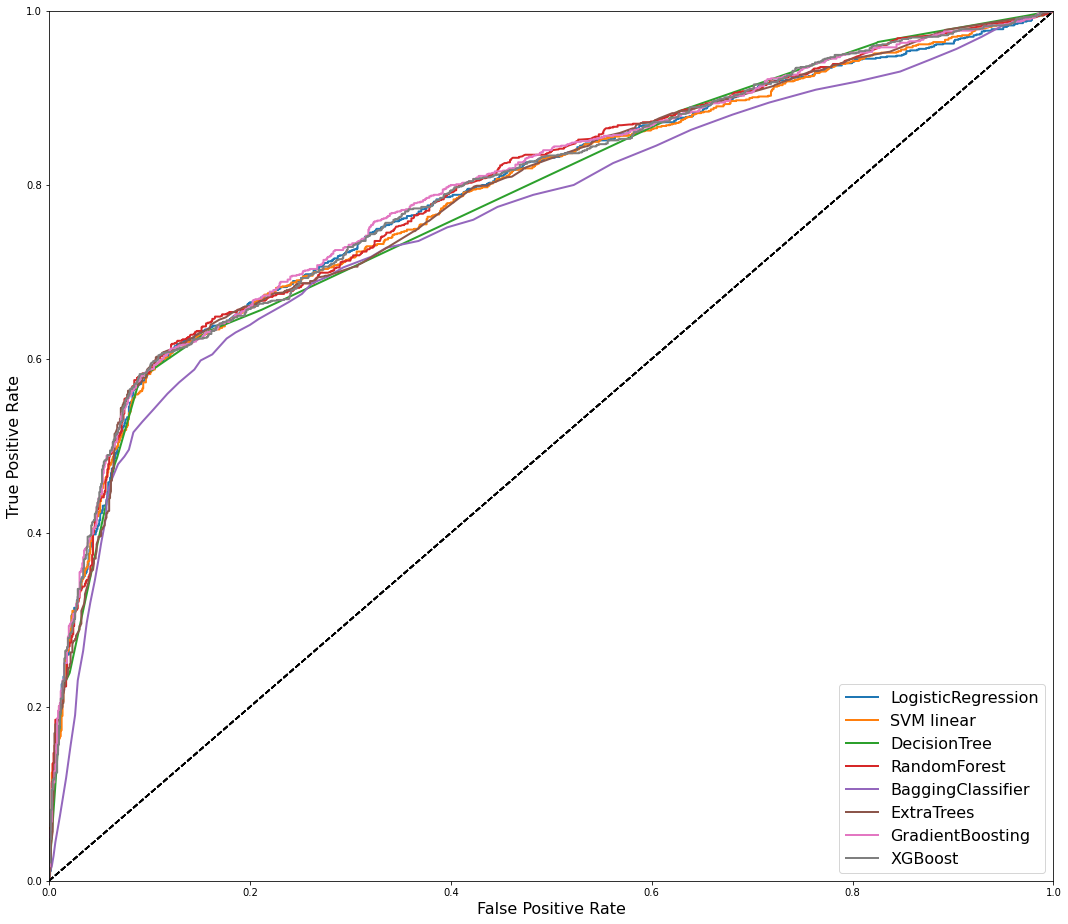

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(18, 16))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()

Model got similiar results I picked XGBoost to show overall results

In [ ]:
y_pred = grid_9.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77      1120
           1       0.84      0.61      0.70      1150

    accuracy                           0.74      2270
   macro avg       0.76      0.74      0.74      2270
weighted avg       0.76      0.74      0.74      2270



Results are a bit worse compering to upsampeled method.

The F1 score decreased about 6%.

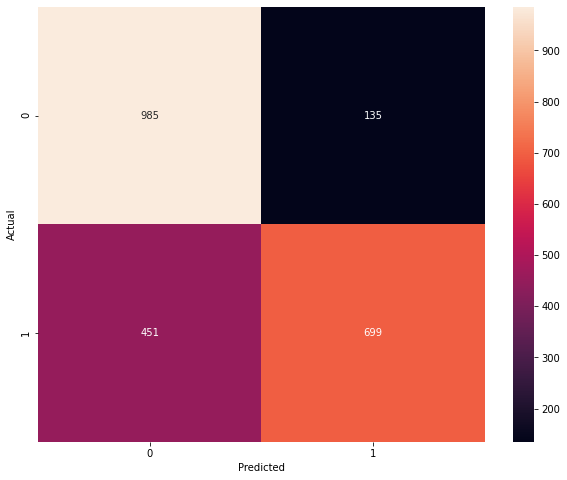

In [ ]:
data = {'Actual':y_test.tolist(),'Predicted':y_pred.tolist()}

df = pd.DataFrame(data,columns=['Actual','Predicted'])

confusion_matrix = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True,fmt='d')
plt.show()

The best performed model accurately identified true positives 699 times out of 1150, but it also got 135 false positives.

Conculsion

Taking into account that classes were unbalanced, I have started usig some method to deal with it. 

Unsampled method got the best results so far.

#Scenario 5 -> New Customers

As in dataset there are columns (pdays, previous) which identify if particular customer is a new one or existing I will split customers into two groups to check how model works only for those who are new or existin customers.

Column pdays says that when is 999 it is a new client

In [ ]:
df_new_customers = dataset.loc[dataset['pdays']==999]
df_new_customers['target'].value_counts()

0    30131
1     2919
Name: target, dtype: int64

In [ ]:
df_new_customers.sample(10)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,housing_1,loan_1,job_blue-collar,job_housemaid,job_non-active,job_self-employed,job_student,job_tech-services,marital_single,education_high.school,education_professional.course,education_university.degree,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
7853,58,2,999.0,0,1.4,94.465,-41.8,4.865,5228.1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
8420,60,4,999.0,0,1.4,94.465,-41.8,4.864,5228.1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
19745,51,1,999.0,0,1.4,93.444,-36.1,4.966,5228.1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
17812,29,2,999.0,0,1.4,93.918,-42.7,4.961,5228.1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
2340,48,2,999.0,0,1.1,93.994,-36.4,4.856,5191.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
8608,25,2,999.0,0,1.4,94.465,-41.8,4.864,5228.1,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
6160,55,1,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
19722,31,3,999.0,0,1.4,93.444,-36.1,4.968,5228.1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
313,58,2,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
27971,48,1,999.0,0,-1.8,92.843,-50.0,1.510,5099.1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


##Modeling

In [ ]:
y_new = np.array(df_new_customers['target'])
y_new.shape

(33050,)

In [ ]:
X_new = df_new_customers.drop('target',axis=1)

X_new = np.array(X_new)

In [ ]:
X_new.shape

(33050, 37)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=123)

##Logistic Regression

In [ ]:
pipe= Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1,max_iter=1000))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

{'classifier__C': 100}

##LinearSVC

In [ ]:
pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.1}

##DecisionTree

In [ ]:
DecisionTreeClassifier()
pipe_3 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 20,
 'classifier__min_samples_split': 30,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

##RandomForest

In [ ]:
pipe_4 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_4 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 10}

##BaggingClassifier

In [ ]:
pipe_5 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_samples': 10, 'classifier__n_estimators': 10}

##ExtraTrees

In [ ]:
pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 10}

##GradientBoosting

In [ ]:
pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_8 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 0.2, 'classifier__n_estimators': 50}

##XGBoost

In [ ]:
pipe_9 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_9 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.2, 'classifier__n_estimators': 100}

In [ ]:
models = []

models.append(('LogisticRegression', grid.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('DecisionTree', grid_3.best_estimator_))
models.append(('RandomForest', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))
models.append(('ExtraTrees', grid_7.best_estimator_))
models.append(('GradientBoosting', grid_8.best_estimator_))
models.append(('XGBoost', grid_9.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))
    elif (name == 'Vo hard'):
        pass
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    elif (name == 'Vo hard'):
        roc_auc_score.append(0)
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
    print()

LogisticRegression
precision_score: 0.5483870967741935
recall_score: 0.07407407407407407
f1_score: 0.13051823416506717
accuracy_score: 0.9086232980332829
roc_auc_score: 0.7391955633722498

SVM linear
precision_score: 0.5194805194805194
recall_score: 0.04357298474945534
f1_score: 0.08040201005025126
accuracy_score: 0.9077155824508321
roc_auc_score: 0.7377193995674666

DecisionTree
precision_score: 0.5655737704918032
recall_score: 0.07516339869281045
f1_score: 0.1326923076923077
accuracy_score: 0.9090267271810388
roc_auc_score: 0.7314237885637503

RandomForest
precision_score: 0.5909090909090909
recall_score: 0.07080610021786492
f1_score: 0.1264591439688716
accuracy_score: 0.9094301563287948
roc_auc_score: 0.7459525361031745

BaggingClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision_score: 0.0
recall_score: 0.0
f1_score: 0.0
accuracy_score: 0.9074130105900151
roc_auc_score: 0.6761203746685835

ExtraTrees
precision_score: 0.6190476190476191
recall_score: 0.014161220043572984
f1_score: 0.02768903088391906
accuracy_score: 0.90791729702471
roc_auc_score: 0.7392562832006699

GradientBoosting
precision_score: 0.582010582010582
recall_score: 0.11982570806100218
f1_score: 0.19873532068654018
accuracy_score: 0.9105395864851236
roc_auc_score: 0.7486402511803136

XGBoost
precision_score: 0.5625
recall_score: 0.10784313725490197
f1_score: 0.18098720292504572
accuracy_score: 0.9096318709026727
roc_auc_score: 0.7486387982631829



In [ ]:
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest','BaggingClassifier','ExtraTrees','GradientBoosting','XGBoost'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,LogisticRegression,0.548387,0.074074,0.130518,0.908623,0.739196
1,SVM linear,0.519481,0.043573,0.080402,0.907716,0.737719
2,DecisionTree,0.565574,0.075163,0.132692,0.909027,0.731424
3,RandomForest,0.590909,0.070806,0.126459,0.909430,0.745953
4,BaggingClassifier,0.000000,0.000000,0.000000,0.907413,0.676120
5,ExtraTrees,0.619048,0.014161,0.027689,0.907917,0.739256
6,GradientBoosting,0.582011,0.119826,0.198735,0.910540,0.748640
7,XGBoost,0.562500,0.107843,0.180987,0.909632,0.748639


LogisticRegression
SVM linear
DecisionTree
RandomForest
BaggingClassifier
ExtraTrees
GradientBoosting
XGBoost


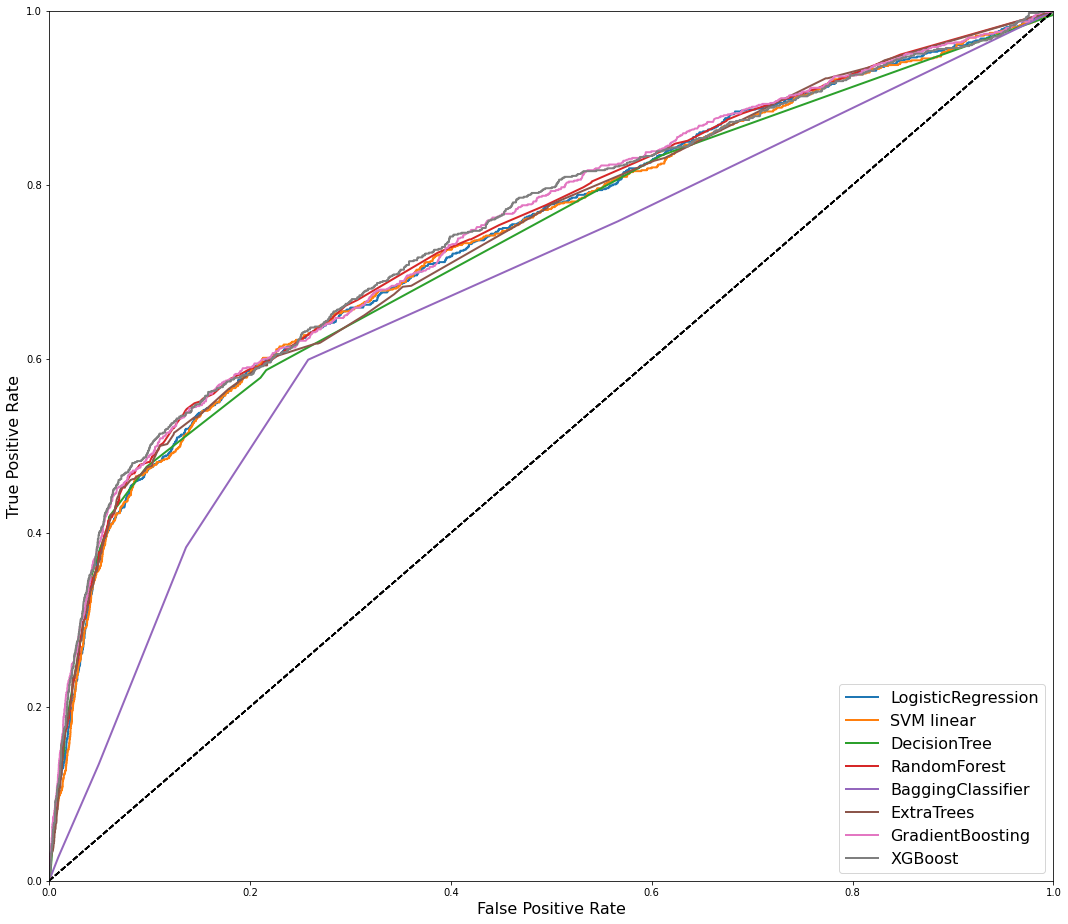

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(18, 16))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()

The best model for new customers is GradientBoosting

In [ ]:
y_pred = grid_8.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8997
           1       0.58      0.12      0.20       918

    accuracy                           0.91      9915
   macro avg       0.75      0.56      0.58      9915
weighted avg       0.89      0.91      0.88      9915



Conclusion

Modeling data using only those who never subscribe anything (new customers) give really poor results.

#Scenario 6 -> Current Customers


Now I take into account only existing customer to check how well model can predict if they take bank term.

In [ ]:
df_current_customers = dataset.loc[dataset['pdays']!=999]
df_current_customers['target'].value_counts()

1    864
0    501
Name: target, dtype: int64

In [ ]:
df_current_customers.sample(10)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,housing_1,loan_1,job_blue-collar,job_housemaid,job_non-active,job_self-employed,job_student,job_tech-services,marital_single,education_high.school,education_professional.course,education_university.degree,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
39659,28,1,6.0,1,-1.8,93.876,-40.0,0.683,5008.7,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
37704,37,3,9.0,1,-2.9,92.201,-31.4,0.851,5076.2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
39697,28,1,3.0,5,-1.8,93.876,-40.0,0.690,5008.7,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
36028,31,1,2.0,1,-1.8,92.893,-46.2,1.266,5099.1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
32891,30,2,11.0,1,-1.8,92.893,-46.2,1.299,5099.1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
33250,28,1,12.0,1,-1.8,92.893,-46.2,1.291,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
40155,37,1,6.0,2,-1.7,94.215,-40.3,0.846,4991.6,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
32317,35,1,12.0,1,-1.8,92.893,-46.2,1.313,5099.1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
37792,51,1,6.0,2,-2.9,92.201,-31.4,0.838,5076.2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
39408,27,1,12.0,1,-1.8,93.749,-34.6,0.638,5008.7,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


##Modeling

In [ ]:
y_curr = np.array(df_current_customers['target'])
y_curr.shape

(1365,)

In [ ]:
X_curr = np.array(df_current_customers.drop('target',axis=1))
X_curr.shape

(1365, 37)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_curr, y_curr, test_size=0.3, random_state=123)

##Logistic Regression

In [ ]:
pipe= Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1,max_iter=1000))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

{'classifier__C': 0.01}

##LinearSVC

In [ ]:
pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 0.001}

##DecisionTree

In [ ]:
DecisionTreeClassifier()
pipe_3 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 14,
 'classifier__min_samples_split': 30,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

##RandomForest

In [ ]:
pipe_4 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_4 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 10,
 'classifier__n_estimators': 50}

##BaggingClassifier

In [ ]:
pipe_5 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_samples': 20, 'classifier__n_estimators': 100}

##ExtraTrees

In [ ]:
pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 50}

##GradientBoosting

In [ ]:
pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_8 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}

##XGBoost

In [ ]:
pipe_9 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_9 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}

In [ ]:
models = []

models.append(('LogisticRegression', grid.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('DecisionTree', grid_3.best_estimator_))
models.append(('RandomForest', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))
models.append(('ExtraTrees', grid_7.best_estimator_))
models.append(('GradientBoosting', grid_8.best_estimator_))
models.append(('XGBoost', grid_9.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))
    elif (name == 'Vo hard'):
        pass
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    elif (name == 'Vo hard'):
        roc_auc_score.append(0)
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
    print()

LogisticRegression
precision_score: 0.7253731343283583
recall_score: 0.9135338345864662
f1_score: 0.8086522462562398
accuracy_score: 0.7195121951219512
roc_auc_score: 0.736985693400167

SVM linear
precision_score: 0.740983606557377
recall_score: 0.849624060150376
f1_score: 0.7915936952714536
accuracy_score: 0.7097560975609756
roc_auc_score: 0.7380299707602338

DecisionTree
precision_score: 0.7418300653594772
recall_score: 0.8533834586466166
f1_score: 0.7937062937062936
accuracy_score: 0.7121951219512195
roc_auc_score: 0.6921078738512949

RandomForest
precision_score: 0.7208588957055214
recall_score: 0.8834586466165414
f1_score: 0.7939189189189189
accuracy_score: 0.7024390243902439
roc_auc_score: 0.7298062865497077

BaggingClassifier
precision_score: 0.7260726072607261
recall_score: 0.8270676691729323
f1_score: 0.773286467486819
accuracy_score: 0.6853658536585366
roc_auc_score: 0.7001227025898078

ExtraTrees
precision_score: 0.7194029850746269
recall_score: 0.9060150375939849
f1_score: 

In [ ]:
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest','BaggingClassifier','ExtraTrees','GradientBoosting','XGBoost'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,LogisticRegression,0.725373,0.913534,0.808652,0.719512,0.736986
1,SVM linear,0.740984,0.849624,0.791594,0.709756,0.738030
2,DecisionTree,0.741830,0.853383,0.793706,0.712195,0.692108
3,RandomForest,0.720859,0.883459,0.793919,0.702439,0.729806
4,BaggingClassifier,0.726073,0.827068,0.773286,0.685366,0.700123
5,ExtraTrees,0.719403,0.906015,0.801997,0.709756,0.741737
6,GradientBoosting,0.729560,0.872180,0.794521,0.707317,0.731086
7,XGBoost,0.734375,0.883459,0.802048,0.717073,0.736398


LogisticRegression
SVM linear
DecisionTree
RandomForest
BaggingClassifier
ExtraTrees
GradientBoosting
XGBoost


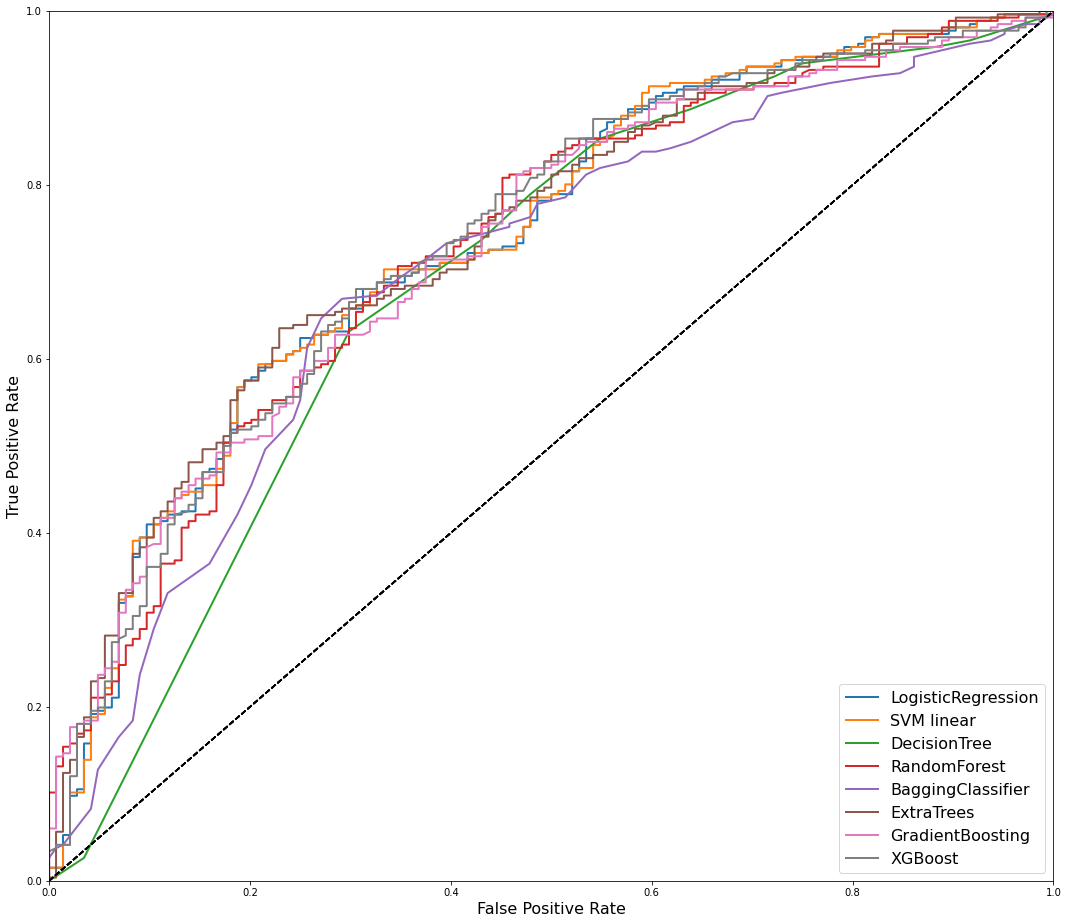

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(18, 16))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()

The Logistic Regression model got the best score.

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.36      0.47       144
           1       0.73      0.91      0.81       266

    accuracy                           0.72       410
   macro avg       0.71      0.64      0.64       410
weighted avg       0.71      0.72      0.69       410



F1 score is much better compering to model built based on new customer dataset.

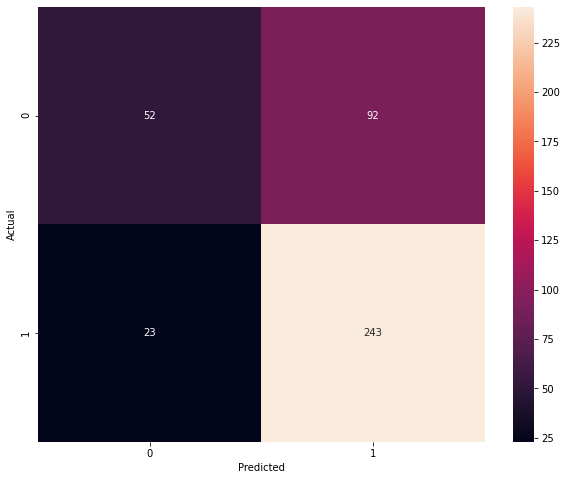

In [ ]:
data = {'Actual':y_test.tolist(),'Predicted':y_pred.tolist()}

df = pd.DataFrame(data,columns=['Actual','Predicted'])

confusion_matrix = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix, annot=True,fmt='d')
plt.show()

The best performed model accurately identified true positives 243 times out of 266, but it also got 92 false positives.

Conculsion

The modeling idea of focusing on existing clients got good results.


#Summary

During this case study I wanted to analyse bank marketing dataset for classification purposes.

Due to the fact that data has been highly unbalanced, using the standard way of modeling and checking the output based on accurency metric makes no sense. As only 11% of clients decided to take bank term.

To deal to with the unbalanced data I decided to check SMOTE, upsampled and downsampled techniques.

Performance increased after balancing the dataset. 

XGBoost classfier using the upsampled method gives the best F1 score result.  

I also tested if splitting customers into new and existing ones gives any interesting insights. 

On the dataset related to new clients the F1 score was really low, which means that this model cannot accurately predict getting a bank term by a new customer.

On the dataset related to existing clients the F1 score shows much better results. I think such a model can be used to predict getting a bank term by an existing customer.